## Summary


<p>
Customer analytics is a process by which data from customer behavior is used to help make key business decisions via market segmentation and predictive analytics. This information is used by businesses for direct marketing, site selection, and customer relationship management. Marketing provides services in order to satisfy customers. With that in mind, the productive system is considered from its beginning at the production level, to the end of the cycle at the consumer. Customer analytics plays an important role in the prediction of customer behavior.
<a href="https://en.wikipedia.org/wiki/Customer_analytics">Wikipedia: Customer analytics</a> 
</p> 

<p>
In this project data is used to observe customer behavior, understand it over time periods,
develop Key Performance Indicators and conduct A/B Testing. The techniques applied here are
allowed to make proactive, data-driven business decisions, which generate customer value and financial
profit.
</p> 

<p>
This project in applies a variety of methods in inferential statistics, data exploration and data aggregation.These methods and concepts are applied:
</p>

<ul>
<li>data import</li>
<li>data exploration</li>
<li>statistics</li>
<li>data aggregation</li>
<li>data grouping</li>
<li>pivot-tables</li>
<li>data merging</li>
<li>data visualization</li>
<li>data cleaning</li>
<li>Regression analysis</li>
<li>Chi-squared test</li>
<li>time series analysis</li>
<li>identifying seasonal trends</li>
<li>constructing Key Performance Indicators (KPI's)</li>    
<li>developing a variety of conversion rates </li>
<li>paywalls</li> 
<li>rolling revenue averages</li>    
<li>marketing measures and conversion rates</li>   
<li>statistical power and sample size</li>
<li>sensitivities</li>
<li>AB-testing</li>  
<li>checking assumption of normality</li>
<li>skewness</li>    
<li>sampling distributions</li>
<li>Center limit theorem</li>
<li>doing a T-test step-by-step</li>
<li>T-test with scipy.stats import ttest_ind</li>
<li>check the statistical significance with <br> 
the t-statistic, critical value, p-value, significance levels.
</li>      

</ul>
    
<p>
Comments, conclusiona and explanations are given within the coding.
</p> 


#### Working directory

In [1433]:
import os 
dirpath = os.getcwd()
foldername = os.path.basename(dirpath)
# print(dirpath)
# print(foldername)


## Import packages

In [1434]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import math
import os
import types
from random import sample
from random import choices
import random
import warnings

from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind

import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower


from datetime import datetime, timedelta


numpy version:  1.16.2


## Import data

In [1435]:
demo = pd.read_csv('user_demographics_v1.csv')
app = pd.read_csv('purchase_data_v1.csv')

## Explore and clean data

In [1436]:
print(demo.shape)
print(app.shape)

(10000, 6)
(9006, 4)


In [1437]:
# user or customer graphics
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
uid         10000 non-null float64
reg_date    10000 non-null object
device      10000 non-null object
gender      10000 non-null object
country     10000 non-null object
age         10000 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 468.8+ KB


In [1438]:
# in app purchases
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 4 columns):
date     9006 non-null object
uid      9006 non-null int64
sku      9006 non-null object
price    9006 non-null int64
dtypes: int64(2), object(2)
memory usage: 281.5+ KB


In [1439]:
print(demo.columns)
print(app.columns)


Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


In [1440]:
print(demo.loc[:5, 'uid'])
print(app.loc[:5, 'uid'])

0    54030035.0
1    72574201.0
2    64187558.0
3    92513925.0
4    99231338.0
5    64229733.0
Name: uid, dtype: float64
0    41195147
1    41195147
2    41195147
3    91591874
4    91591874
5    90783242
Name: uid, dtype: int64


There are two date columns stored as objects.
These variables are converted to datetime.

In [1441]:
print(demo.reg_date[:5])
print(app.date[:5])

0    2017-06-29T00:00:00Z
1    2018-03-05T00:00:00Z
2    2016-02-07T00:00:00Z
3    2017-05-25T00:00:00Z
4    2017-03-26T00:00:00Z
Name: reg_date, dtype: object
0    2017-07-10
1    2017-07-15
2    2017-11-12
3    2017-09-26
4    2017-12-01
Name: date, dtype: object


In [1442]:
demo['reg_date'] = pd.to_datetime(demo['reg_date'], format='%Y-%m-%d')
print(demo.reg_date[:5])
print(demo.reg_date.dtype)

0   2017-06-29 00:00:00+00:00
1   2018-03-05 00:00:00+00:00
2   2016-02-07 00:00:00+00:00
3   2017-05-25 00:00:00+00:00
4   2017-03-26 00:00:00+00:00
Name: reg_date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]


In [1443]:
app['date'] = pd.to_datetime(app['date'], format='%Y-%m-%d', utc = True)
print(app.date[:5])
print(app.date.dtype)

0   2017-07-10 00:00:00+00:00
1   2017-07-15 00:00:00+00:00
2   2017-11-12 00:00:00+00:00
3   2017-09-26 00:00:00+00:00
4   2017-12-01 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]


Intuitively registration date and purchase are not identical most of the time.
Most of the time users will use the basic freemium service before buying in-app services. Let's check this intuition.

In [1444]:
app['date'].equals(demo['reg_date'])

False

In [1445]:
intersection_reg_dt = \
pd.Series(list(set(app['date']).intersection(set(demo['reg_date']))))

print(type(intersection_reg_dt))
print(len(intersection_reg_dt))

print(app['date'].shape)
print(demo['reg_date'].shape)



<class 'pandas.core.series.Series'>
938
(9006,)
(10000,)


Only 938 datetime values in both series are identical. These users have registered and bought in-app services at the same time. The datetime values are to a large part not equal. The intuition was correct.

In [1446]:
# rename reg_date to user_registration_date to make the difference between
# the dates clearer
demo.rename(columns={'reg_date': 'user_registration_date'}, inplace=True)
print(demo.columns.tolist())

# rename date to purchase_date to make the difference between
# the dates clearer
# purchase_date = in_app_purchase_date
app.rename(columns={'date': 'purchase_date'}, inplace=True)
print(app.columns.tolist())

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age']
['purchase_date', 'uid', 'sku', 'price']


#### Merge both df on uid.

In [1447]:
demapp = demo.merge(app, how='inner', on = ['uid'])
print(demapp.shape)

(9006, 9)


In [1448]:
demapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 9 columns):
uid                       9006 non-null float64
user_registration_date    9006 non-null datetime64[ns, UTC]
device                    9006 non-null object
gender                    9006 non-null object
country                   9006 non-null object
age                       9006 non-null int64
purchase_date             9006 non-null datetime64[ns, UTC]
sku                       9006 non-null object
price                     9006 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(4)
memory usage: 703.6+ KB


Are there null-values?

In [1449]:
demapp.isnull().sum()

uid                       0
user_registration_date    0
device                    0
gender                    0
country                   0
age                       0
purchase_date             0
sku                       0
price                     0
dtype: int64

### Exploring and plotting variables by data type

#### Numerical variables

In [1450]:
demapp.describe()[['age', 'price']]

,age,price
count,9006.000000,9006.000000
mean,23.922274,406.772596
std,9.044646,187.918230
min,15.000000,99.000000
25%,17.000000,299.000000
50%,21.000000,299.000000
75%,28.000000,499.000000
max,75.000000,899.000000


In [1451]:
print(demapp.price.value_counts().sort_values())
print('price structure: {}'.format(pd.Series(demapp.price.unique()).sort_values().
                                   reset_index(drop=True)))

99      357
899     372
199    1840
599    1848
499    2242
299    2347
Name: price, dtype: int64
price structure: 0     99
1    199
2    299
3    499
4    599
5    899
dtype: int64


In [1452]:
print(demapp.age.value_counts().head())
print(demapp.age.value_counts().shape)
age_unique = demapp.age.unique().tolist()
age_unique_sorted = sorted(age_unique )
print(age_unique_sorted)

15    957
16    856
17    720
19    584
18    529
Name: age, dtype: int64
(51,)
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 64, 65, 66, 75]


Customer age ranges from 15 to 75.

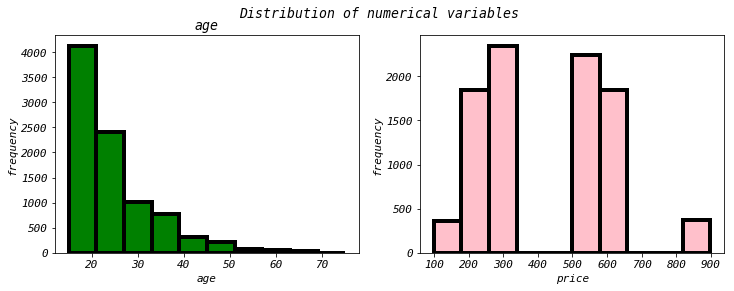

In [1453]:
fig = plt.figure(figsize=(12,4))
plt.suptitle('Distribution of numerical variables')
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_xlabel('age')
ax1.set_ylabel('frequency')

ax1.hist(demapp['age'], color='green', edgecolor='black', linewidth=4)
ax1.set_title('age')
ax2.hist(demapp['price'], color='pink', edgecolor='black', linewidth=4)
ax2.set_xlabel('price')
ax2.set_ylabel('frequency')

plt.show()

#### Correlations

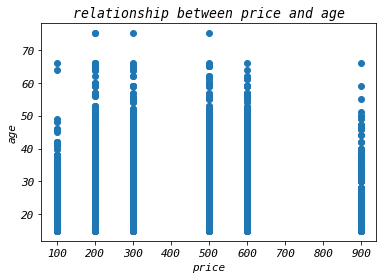

In [1454]:
plt.scatter( demapp.price, demapp.age)
plt.xlabel('price')
plt.ylabel('age')
plt.title('relationship between price and age')
plt.show()

In [1455]:
demapp[['age', 'price']].corr()

,age,price
age,1.000000,-0.010196
price,-0.010196,1.000000


The correlation is weak and negative.

#### Regression analysis

In [1456]:
# Define X and y
X = demapp['age']
y = demapp['price']
X = sm.add_constant(X)

# Build linear regression model
debt_model = sm.OLS(y, X).fit()

predictions = debt_model.predict(X)
# print(predictions[:5])

# Print out the model summary statistics
debt_model.summary()

C:\Users\gamarandor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9362
Date:                Thu, 24 Oct 2019   Prob (F-statistic):              0.333
Time:                        14:54:20   Log-Likelihood:                -59933.
No. Observations:                9006   AIC:                         1.199e+05
Df Residuals:                    9004   BIC:                         1.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.8405      5.600     73.549      0.000     400.864     422.817
age           -0.2118      0.219     -0.968      0.333      -0.641       0.217
==============================================================================
Omnibus:                      344.081   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.071
Skew:                           0.491   Prob(JB):                     1.32e-82
Kurtosis:                       2.801   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Interpretation</b>:
The R-squared or coefficient of determination is with 0.000 low.
The variance explained by the model of the overall variance is ca. 0 %. 
This indicates lowest goodnes of fit.
Given a one unit shift in age the dependent variable 
price changes in -0.2118  units while all other variables are 
staying constant.
The coefficient for price is with a p-value of 0.333 greater than 0.05
not significant. Age is not a good predictor for price.

#### Categorical variables

In [1457]:
cat_cols = demapp.select_dtypes(include='object')
print(cat_cols.columns.tolist())

['device', 'gender', 'country', 'sku']


In [1458]:
demapp_cat_vc = []

for i in cat_cols.columns.tolist():
    vc = demapp[i].value_counts()
    demapp_cat_vc.append(vc)
    

In [1459]:
print(demapp_cat_vc[:4])

[and    5345
iOS    3661
Name: device, dtype: int64, F    4791
M    4215
Name: gender, dtype: int64, USA    3650
BRA    2694
DEU     915
TUR     804
FRA     544
CAN     399
Name: country, dtype: int64, sku_two_299       1968
sku_three_499     1877
sku_four_599      1848
sku_one_199       1840
sku_six_1299       379
sku_five_899       372
sku_seven_1499     365
sku_eight_2099     357
Name: sku, dtype: int64]


In [1460]:
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6']

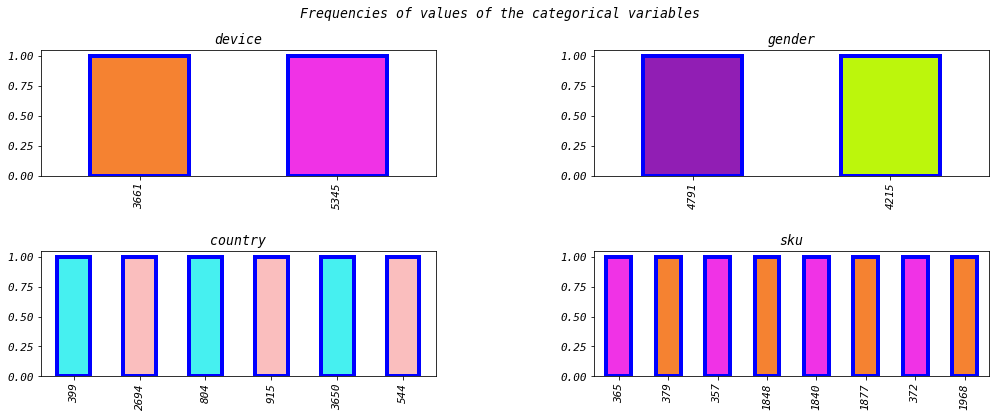

In [1461]:
fig = plt.figure(figsize=(17,6))
plt.suptitle("Frequencies of values of the categorical variables")
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i, m in zip(range(1,5), range(0,4)):
    ax = fig.add_subplot(2,2,i)
    ax = demapp_cat_vc[m].value_counts().plot.bar(title=cat_cols.columns.tolist()[m],
                                                  color=[color_list[m], color_list[m+3]],
                                                  edgecolor="b", linewidth=4)

Values are largely balanced.

#### Investigating how likely the observations are given the null-hypothesis is true with Chi-squared tests.

<p>
The Chi-squared test is used to determine whether there is a significant
difference between the observed and the expected frequencies.
The null-hypothesis is that there is not a difference.
It is rejected when the p-value is smaller than the significant level (of 0.05).
</p> 
<a href="https://en.wikipedia.org/wiki/Chi-squared_test">Wikipedia</a> 

In [1462]:
# making a function for one main variable and several other,
# which generates frequency tables, p-values of Chi-square-tests and
# decides about the null-hypothesis

def combinations_cross_chi(cat_cols, main, significance_level):
        cat_cols_2 = cat_cols.drop(columns=[main], axis=1)
        crosstabs = []
        p_values = {}
        for m in range(0,cat_cols_2.shape[1]):
            crosstab = pd.crosstab(cat_cols[main], cat_cols_2.iloc[:,m], 
                                   dropna=True)
            crosstabs.append(crosstab)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstabs[m])
            p_values[cat_cols_2.columns[m]]=p_val
        
        p_values_df = \
        pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])
        
        p_values_df['reject?'] = np.where(p_values_df['p-value'] > significance_level, 
                                          'not reject', 'reject' )
        
        return (crosstabs, p_values_df)
    

In [1463]:
device_cross, device_chi = combinations_cross_chi(cat_cols, main='device',
                                                  significance_level=0.05)

In [1464]:
for i in device_cross:
    print(i)

gender     F     M
device            
and     2804  2541
iOS     1987  1674
country   BRA  CAN  DEU  FRA  TUR   USA
device                                 
and      1666  230  518  289  464  2178
iOS      1028  169  397  255  340  1472
sku     sku_eight_2099  sku_five_899  sku_four_599  sku_one_199  \
device                                                            
and                207           219          1113         1073   
iOS                150           153           735          767   

sku     sku_seven_1499  sku_six_1299  sku_three_499  sku_two_299  
device                                                            
and                217           247           1116         1153  
iOS                148           132            761          815  


In [1465]:
device_chi

,p-value,reject?
gender,0.094208,not reject
country,0.001227,reject
sku,0.376177,not reject


For gender and sku the null-hypothesis is not rejected.
For country it is rejected. 
This indicates that country and device type is correlated. 
It is plausible that some countries have more android or iOS users.

In [1466]:
gender_cross, gender_chi = combinations_cross_chi(cat_cols, main='gender',
                                                  significance_level=0.05)

In [1467]:
for i in gender_cross:
    print(i)

device   and   iOS
gender            
F       2804  1987
M       2541  1674
country   BRA  CAN  DEU  FRA  TUR   USA
gender                                 
F        1370  212  581  284  478  1866
M        1324  187  334  260  326  1784
sku     sku_eight_2099  sku_five_899  sku_four_599  sku_one_199  \
gender                                                            
F                  149           143          1023         1049   
M                  208           229           825          791   

sku     sku_seven_1499  sku_six_1299  sku_three_499  sku_two_299  
gender                                                            
F                  161           158           1023         1085  
M                  204           221            854          883  


In [1468]:
gender_chi

,p-value,reject?
device,9.420850e-02,not reject
country,1.731934e-12,reject
sku,3.993094e-19,reject


<p>The null hypothesis is rejected for gender - country and gender - sku.</p> 

<p>p-value is with 0.09420849507842334 the same for device - gender or gender - device. This indicates it the function works.</p> 


#### Date and time series

In [1469]:
dx_meanprice = demapp.groupby('user_registration_date')['price'].mean()
print(dx_meanprice.head())

user_registration_date
2015-01-27 00:00:00+00:00    399.000000
2015-02-01 00:00:00+00:00    370.428571
2015-02-09 00:00:00+00:00    440.666667
2015-02-10 00:00:00+00:00    435.363636
2015-03-01 00:00:00+00:00    365.666667
Name: price, dtype: float64


In [1470]:
dy_meanprice = \
demapp.groupby('purchase_date')['price'].mean()
print(dy_meanprice.head())


purchase_date
2015-03-02 00:00:00+00:00    199.0
2015-04-04 00:00:00+00:00    299.0
2015-04-10 00:00:00+00:00    199.0
2015-04-15 00:00:00+00:00    549.0
2015-05-05 00:00:00+00:00    299.0
Name: price, dtype: float64


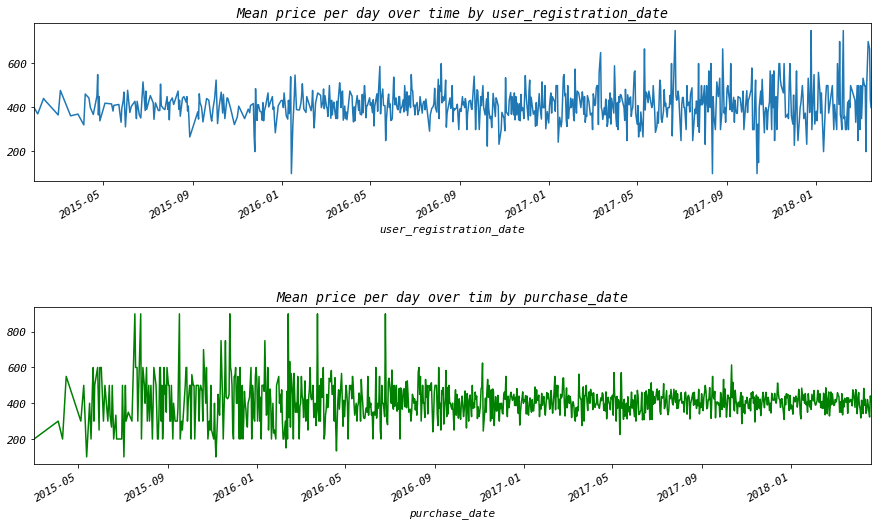

In [1471]:
fig = plt.figure(figsize=(15, 9))
fig.subplots_adjust(hspace=0.8)

fig.add_subplot(2,1,1)
dx_meanprice.plot(title='Mean price per day over time by user_registration_date')

fig.add_subplot(2,1,2)
dy_meanprice.plot(title='Mean price per day over tim by purchase_date', 
                  color='green')
plt.show()

In [1472]:
dx_age = demapp.groupby('user_registration_date')['age'].mean()
print(dx_age.head())

dy_age = demapp.groupby('purchase_date')['age'].mean()
print(dy_age.head())

user_registration_date
2015-01-27 00:00:00+00:00    52.0
2015-02-01 00:00:00+00:00    15.0
2015-02-09 00:00:00+00:00    23.0
2015-02-10 00:00:00+00:00    19.0
2015-03-01 00:00:00+00:00    22.0
Name: age, dtype: float64
purchase_date
2015-03-02 00:00:00+00:00    23.0
2015-04-04 00:00:00+00:00    23.0
2015-04-10 00:00:00+00:00    33.0
2015-04-15 00:00:00+00:00    20.5
2015-05-05 00:00:00+00:00    40.0
Name: age, dtype: float64


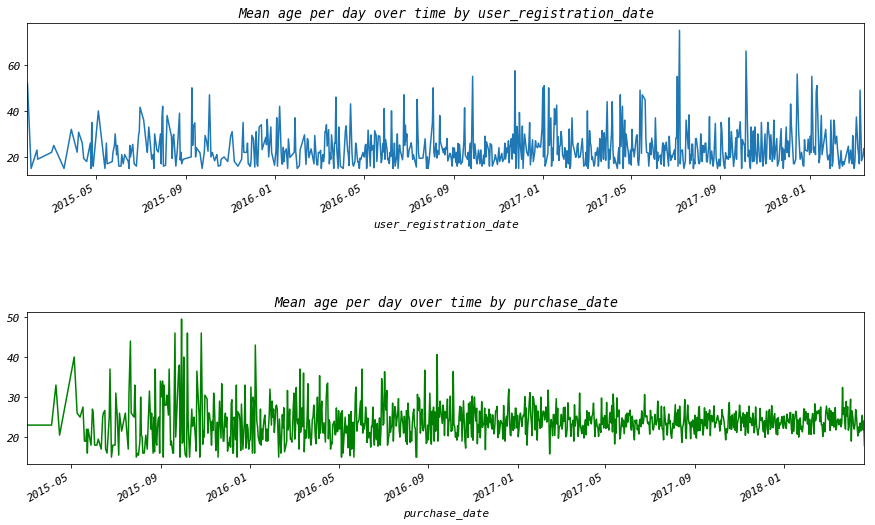

In [1473]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,9))
fig.subplots_adjust(hspace=0.9)

dx_age.plot(ax=ax1, title='Mean age per day over time by user_registration_date')
dy_age.plot(ax=ax2, title='Mean age per day over time by purchase_date', 
            color='green')

plt.show()


In [1474]:
# demapp.gender.unique()

genF = demapp.loc[demapp.gender == 'F']
dx_gender_F = genF.groupby('user_registration_date')['gender'].count()
print(dx_gender_F.head())

genM = demapp.loc[demapp.gender == 'M']
dx_gender_M = genM.groupby('purchase_date')['gender'].count()
print(dx_gender_M.head())


user_registration_date
2015-02-10 00:00:00+00:00    11
2015-03-18 00:00:00+00:00    24
2015-04-05 00:00:00+00:00    18
2015-04-07 00:00:00+00:00    15
2015-04-12 00:00:00+00:00    16
Name: gender, dtype: int64
purchase_date
2015-03-02 00:00:00+00:00    1
2015-04-04 00:00:00+00:00    1
2015-04-10 00:00:00+00:00    1
2015-04-15 00:00:00+00:00    1
2015-05-13 00:00:00+00:00    1
Name: gender, dtype: int64


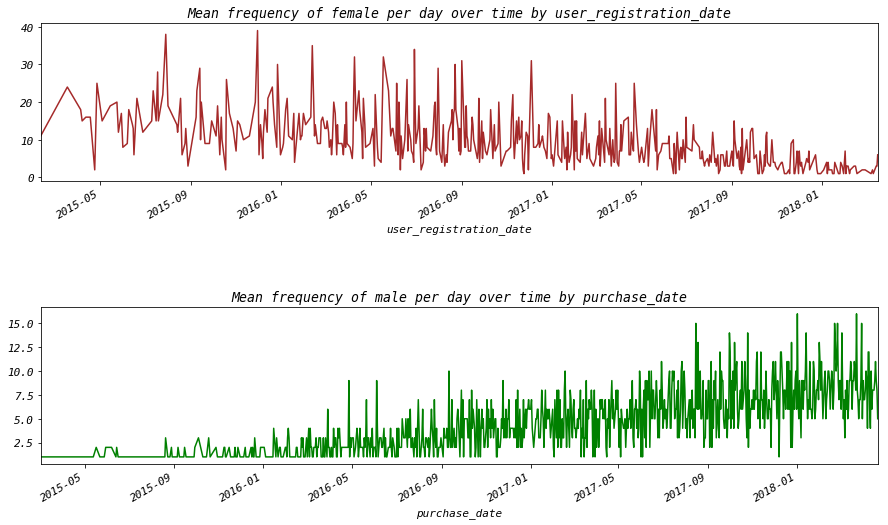

In [1475]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,9))
fig.subplots_adjust(hspace=0.8)
dx_gender_F.plot(ax=ax1, 
                 title='Mean frequency of female per day over time by user_registration_date', 
                 color='brown')
dx_gender_M.plot(ax=ax2, title='Mean frequency of male per day over time by purchase_date', 
                 color='green')

plt.show()

# Interstingly the trend of female and male are conversed.

### Aggregations

<p>by calculating statistics over particular variables 
also with grouping.</p> 

In [1476]:
sales = demapp.copy()
print(sales.columns.tolist())

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age', 'purchase_date', 'sku', 'price']


In [1477]:
# Aggregation over one variable price
price_agg = sales.price.agg(['mean', 'median', 'var', 'std' , 'min', 'max'])
print(price_agg)

mean        406.772596
median      299.000000
var       35313.261330
std         187.918230
min          99.000000
max         899.000000
Name: price, dtype: float64


In [1478]:
# Aggregation over one variable age
age_agg = sales.age.agg(['mean', 'median', 'var', 'std' , 'min', 'max'])
print(age_agg)

mean      23.922274
median    21.000000
var       81.805618
std        9.044646
min       15.000000
max       75.000000
Name: age, dtype: float64


In [1479]:
# Aggregation over two variables
sales.agg({'price': ['mean', 'median', 'std', 'min' , 'max'],
           'age':  ['mean', 'median', 'std', 'min' , 'max']})

,price,age
mean,406.772596,23.922274
median,299.000000,21.000000
std,187.918230,9.044646
min,99.000000,15.000000
max,899.000000,75.000000


In [1480]:
# Aggregation or calculating statistics for variables price and age
# for selected by groups ('device' , 'gender')

group_device_gender = sales.groupby(by=['device' , 'gender'])

group_price = \
group_device_gender['price'].agg(['mean', 'std', 'min', 'max']).round(3)
group_age = \
group_device_gender['age'].agg(['mean', 'std', 'min', 'max']).round(3)


In [1481]:
# produces only a location in memory
# a statistic with agg is needed to produce a table
group_device_gender 

In [1482]:
print(group_price)

                  mean      std  min  max
device gender                            
and    F       400.748  179.984   99  899
       M       416.237  195.002   99  899
iOS    F       404.435  181.525   99  899
       M       405.272  196.843   99  899


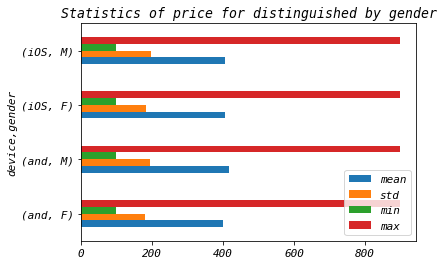

In [1483]:
# pandas plot reveal it strength when working with aggregations
group_price.plot.barh(title="Statistics of price for distinguished by gender")
plt.show()
# bars look similar

In [1484]:
print(group_age)

                 mean    std  min  max
device gender                         
and    F       23.824  8.546   15   66
       M       24.429  9.060   15   65
iOS    F       23.229  9.071   15   65
       M       24.140  9.728   15   75


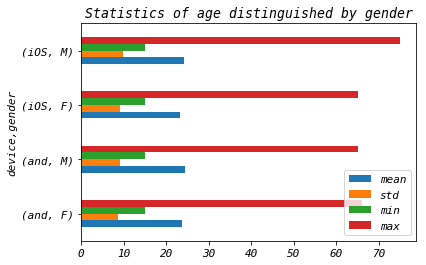

In [1485]:
group_age.plot.barh(title="Statistics of age distinguished by gender")
plt.show()

In [1486]:
# changing the grouping variables produces the same statistics 
# but the table is ordered differently

group_gender_device = sales.groupby(by=['gender', 'device'])

group_price_2 = \
group_gender_device ['price'].agg(['mean', 'var', 'std', 'min', 'max']).round(3)
group_age_2 = \
group_gender_device ['age'].agg(['mean', 'var', 'std', 'min', 'max']).round(3)

In [1487]:
print(group_price_2)

                  mean        var      std  min  max
gender device                                       
F      and     400.748  32394.376  179.984   99  899
       iOS     404.435  32951.308  181.525   99  899
M      and     416.237  38025.593  195.002   99  899
       iOS     405.272  38747.244  196.843   99  899


In [1488]:
print(group_age_2)

                 mean     var    std  min  max
gender device                                 
F      and     23.824  73.036  8.546   15   66
       iOS     23.229  82.290  9.071   15   65
M      and     24.429  82.082  9.060   15   65
       iOS     24.140  94.628  9.728   15   75


## Data modeling by constructing Key Performance Indicators (KPI's)

<p>
A KPI is a measurable value that demonstrates how 
how effectively a company achieves key business objectives.
Changes in KPI's show how good business strategies or a bundle of measures
set up to realize the goals are working.The impact of initializing new actions
(e.g. online advertisement) can be measured with the KPI holding all other factors constant.This way a cause and effect relationship can be determined.
In the next step experimental designs are often applied to research the changes
in the KPI caused by actions taken.
</p> 


### KPI: conversion rate

<p>is the percentage of potential customers, who take a specific action
the company wants, to give a simple definition. Of course the action
is aligned with the business objective.
A fundamental online conversion rate is the percentage of visitors turning into
paying customers. Similar in the freemium business model these are users 
changing from basic free services to fee-based premium services after a period
of try out for example. 
The conversion rate has got therefore not a fixed form, but is constructed 
differently for particular cases.
</p> 

<p>
The conversion rate here is the 
mean purchase price created from users who bought within the first 28 days after registration an in-app service.
</p> 


In [1489]:
print(sales.columns.tolist())

# currentdate = pd.to_datetime('today')
# print(currentdate)

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age', 'purchase_date', 'sku', 'price']


#### KPI: mean purchase price created from users who bought within the first 28 days after registration an in-app service.

In [1490]:
dt_min = sales.purchase_date.min()
print(dt_min)
print(type(dt_min))

dt_max = sales.purchase_date.max()
print(dt_max)
print(type(dt_max))

2015-03-02 00:00:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-04-21 00:00:00+00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [1491]:
# purchase dates to be included are dates less than 28 days from the last purchase date of the data set
max_28 = dt_max - timedelta(days=28)
print(max_28)

2018-03-24 00:00:00+00:00


maximum sales of in app purchases 

In [1492]:
# keep only users who registered not in the last 28 days
# users registered before max 28 
sales_before_max = sales[sales.user_registration_date < max_28]

print(sales.shape)
print(sales_before_max.shape)

print(sales_before_max.loc[:, ['user_registration_date' , 'purchase_date']].reset_index()[0:5])

(9006, 9)
(9006, 9)
   index    user_registration_date             purchase_date
0      0 2017-05-25 00:00:00+00:00 2017-10-20 00:00:00+00:00
1      1 2017-05-25 00:00:00+00:00 2017-05-29 00:00:00+00:00
2      2 2017-05-25 00:00:00+00:00 2017-08-23 00:00:00+00:00
3      3 2017-05-25 00:00:00+00:00 2018-03-26 00:00:00+00:00
4      4 2016-10-16 00:00:00+00:00 2018-03-17 00:00:00+00:00


In [1493]:

# include only users who bought an in-app product within 28 days from registration
# purchase_date is the date, when the in-app-offer was bought
# registration date is the date, when the user registered
# subset user registration date + 28 days is greater than purchase_date

# check user registration date greater purchase_date
sales_within_28_bool_only = \
sales_before_max.purchase_date < sales_before_max.user_registration_date
print(sales_within_28_bool_only.sum())
# print(sales_within_28_bool_only)

sales_within_28_bool = \
sales_before_max.purchase_date < (sales_before_max.user_registration_date + timedelta(days=28))
print(sales_within_28_bool.sum())

sales_within_28 = sales_before_max[(sales_before_max.purchase_date < (sales_before_max.user_registration_date +
                  timedelta(days=28)))]
print(sales_within_28.loc[:, ['user_registration_date' , 'purchase_date']].reset_index()[0:5])

0
608
   index    user_registration_date             purchase_date
0      1 2017-05-25 00:00:00+00:00 2017-05-29 00:00:00+00:00
1      7 2017-04-07 00:00:00+00:00 2017-04-21 00:00:00+00:00
2     25 2017-11-09 00:00:00+00:00 2017-11-16 00:00:00+00:00
3     60 2017-02-15 00:00:00+00:00 2017-02-18 00:00:00+00:00
4     66 2016-09-28 00:00:00+00:00 2016-10-02 00:00:00+00:00


In [1494]:
# mean purchase price created from users who bought within the first 28 days 
# after registration an in-app service
# price in cents!
mean_price_28 = sales_within_28.price.mean()
print(mean_price_28)
print(round(mean_price_28/100, 2))

415.2828947368421
4.15


Given a price structure of:

In [1495]:
sales_price_vc = sales.price.value_counts().sort_index()
print(sales_price_vc)

99      357
199    1840
299    2347
499    2242
599    1848
899     372
Name: price, dtype: int64


In [1496]:
sales_within_28_vc=sales_within_28.price.value_counts().sort_index()
print(sales_within_28_vc)

99      22
199    119
299    153
499    156
599    130
899     28
Name: price, dtype: int64


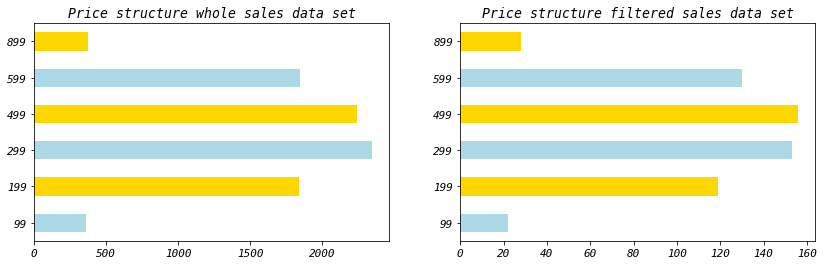

In [1497]:
fig = plt.figure(figsize=(14,4))
fig.add_subplot(1,2,1)
sales_price_vc.plot.barh(color=['lightblue', 'gold'], title='Price structure whole sales data set')
fig.add_subplot(1,2,2)
sales_within_28_vc.plot.barh(color=['lightblue', 'gold'], title='Price structure filtered sales data set')
plt.show()

The mean purchase price for 28 days is in the lower half of prices.
This indicates the users bought cheaper in-app services on average.

#### Differentiating the conversion rate KPI from above 
<p>
by grouping it and comparing the aggregates (mean, median) of the whole price variable 
with the price of the last month of data.
</p> 


In [1498]:
# print(sales.columns)
sales2 = sales.copy()
# user registration at most 28 days ago before max_28
reg_smaller_max = sales2.user_registration_date < max_28
# date of purchase within 28 days of registration
pd_delta = sales.purchase_date < sales2.user_registration_date + timedelta(days=28)
# if pd_delta price otherwise 0
price_one_month = np.where(reg_smaller_max & pd_delta, sales2.price, np.NaN)
sales2['price_one_month'] = price_one_month 

print(sales2.columns.tolist())

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age', 'purchase_date', 'sku', 'price', 'price_one_month']


In [1499]:
s2group = sales2.groupby(['gender', 'device'], as_index=False)

In [1500]:
s2agg = s2group.agg({'price': ['mean', 'median'], 'price_one_month': ['mean', 'median']})
s2agg

gender device       price        price_one_month       
                       mean median            mean median
0      F    and  400.747504    299      390.758242  299.0
1      F    iOS  404.435330    299      429.434783  499.0
2      M    and  416.237308    499      417.285714  499.0
3      M    iOS  405.272401    299      434.398230  499.0

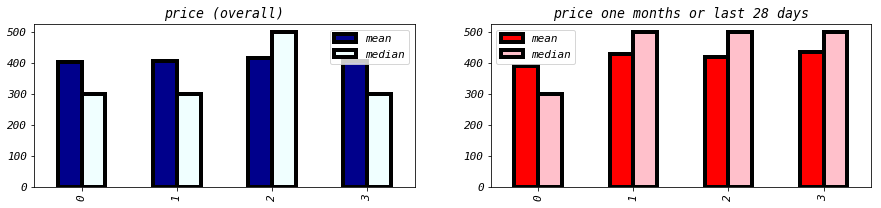

In [1501]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))

s2agg['price'].plot.bar(title='price (overall)', ax=ax1, edgecolor='black' , linewidth = 4,
                        color=['darkblue', 'azure'])
s2agg['price_one_month'].plot.bar(title='price one months or last 28 days', ax=ax2, 
                                  edgecolor='black' , linewidth = 4, color=['r', 'pink'])
plt.show()

In [1502]:
s3group = sales2.groupby(['country'], as_index=False)

In [1503]:
s3agg = s3group.agg({'price': ['mean', 'median'], 'price_one_month': ['mean', 'median']})
s3agg

country       price        price_one_month       
                 mean median            mean median
0     BRA  409.838901    499      424.380711  499.0
1     CAN  398.248120    299      354.000000  299.0
2     DEU  409.054645    499      424.454545  499.0
3     FRA  401.757353    299      430.707317  499.0
4     TUR  415.417910    499      452.731343  499.0
5     USA  403.712329    299      396.807018  299.0

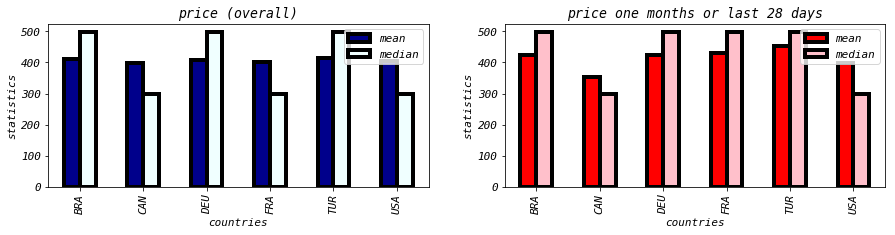

In [1504]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))

s3agg.plot.bar(x='country', y='price',
               title='price (overall)', ax=ax1, edgecolor='black' , linewidth = 4,
                        color=['darkblue', 'azure'])
ax1.set(xlabel="countries", ylabel="statistics")

s3agg.plot.bar(x='country', y='price_one_month',
                                  title='price one months or last 28 days', ax=ax2, 
                                  edgecolor='black' , linewidth = 4, color=['r', 'pink'])
ax2.set(xlabel="countries", ylabel="statistics")

plt.show()

### Did marketing measures applied increased the online conversion rate?

<p>
Given a set of newly introduced marketing actions like a loyalty program, coupons, discounts, 
high quality product images, Rreviews and product Testimonials did the users bought more in app purchase in their first week after registration?
</p>
<p>
An overview over possible measures is presented here: 
<a href="https://artdriver.com/blog/how-to-increase-online-conversion-rate">How to Increase the Online Conversion Rate?</a>
</p> 

In [1505]:
sales3 = sales2.copy()
print(type(sales3))

<class 'pandas.core.frame.DataFrame'>


In [1506]:
fpcurrent = dt_max - timedelta(days=7)
print(fpcurrent)

2018-04-14 00:00:00+00:00


In [1507]:
sales_smaller_fpcurrent = sales3.user_registration_date < fpcurrent
print(sales_smaller_fpcurrent.shape)
print(type(sales_smaller_fpcurrent))

(9006,)
<class 'pandas.core.series.Series'>


In [1508]:
# user_registration_date + timedelta(days=7) -> this creates the first week
fp_delta = sales3.purchase_date < sales3.user_registration_date + timedelta(days=7)

In [1509]:
firstpurchase = np.where(sales_smaller_fpcurrent & fp_delta, 1, 0)
sales3['firstpurchase'] = firstpurchase

In [1510]:
print(sales3.columns.tolist())
print(sales3.firstpurchase.head())
print(sales3.firstpurchase.unique())
print(print(sales3.firstpurchase.value_counts()))

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age', 'purchase_date', 'sku', 'price', 'price_one_month', 'firstpurchase']
0    0
1    1
2    0
3    0
4    0
Name: firstpurchase, dtype: int32
[0 1]
0    8809
1     197
Name: firstpurchase, dtype: int64
None


In [1511]:
fwp = sales3.groupby('user_registration_date').agg({'firstpurchase': ['mean']})
fwp.head()

,firstpurchase
,mean
user_registration_date,
2015-01-27 00:00:00+00:00,0.0
2015-02-01 00:00:00+00:00,0.0
2015-02-09 00:00:00+00:00,0.0
2015-02-10 00:00:00+00:00,0.0
2015-03-01 00:00:00+00:00,0.0


In [1512]:
fwp.columns

MultiIndex(levels=[['firstpurchase'], ['mean']],
           codes=[[0], [0]])

In [1513]:
fwp_columns = fwp.columns.droplevel(level=1)
print(fwp_columns)

Index(['firstpurchase'], dtype='object')


In [1514]:
fwp.reset_index(inplace=True)
print(fwp.head())

     user_registration_date firstpurchase
                                     mean
0 2015-01-27 00:00:00+00:00           0.0
1 2015-02-01 00:00:00+00:00           0.0
2 2015-02-09 00:00:00+00:00           0.0
3 2015-02-10 00:00:00+00:00           0.0
4 2015-03-01 00:00:00+00:00           0.0


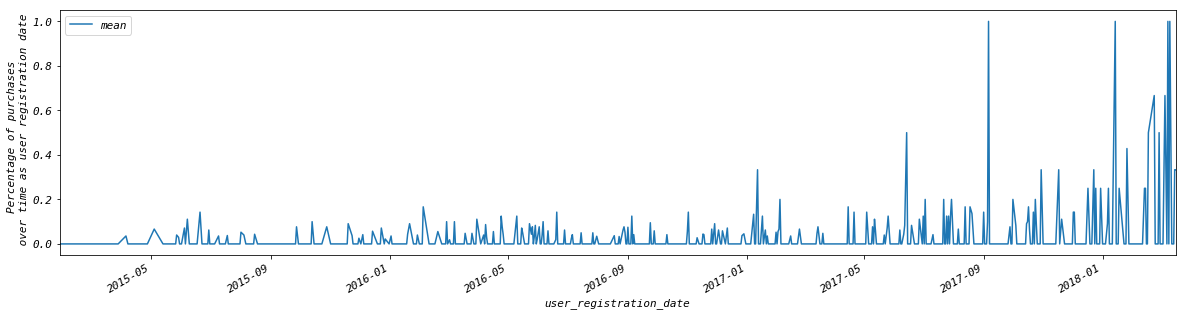

In [1515]:
fwp.plot(x='user_registration_date', y='firstpurchase', figsize=(20,5))
plt.ylabel('Percentage of purchases \n over time as user registration date')
plt.ylim()
plt.show()

The mean in-app pruchases are increasing in the last section of the plot. The measures applied before
resulted in more in-app purchases. A/B testing evaluates such conclusions systematically with 
hypothesis testing based on random samples.

In [1516]:
sales4 = sales3.copy()

# check
# print(fwp.columns)
print(sales4.columns)
# print(sales4.firstpurchase.head())



Index(['uid', 'user_registration_date', 'device', 'gender', 'country', 'age',
       'purchase_date', 'sku', 'price', 'price_one_month', 'firstpurchase'],
      dtype='object')


In [1517]:
sales4_grcountry = sales4.groupby(['country'])['firstpurchase']
sales4_grcountry 
# mean purchases per country in the first week
grcountry_mean = sales4_grcountry.agg('mean')
print(grcountry_mean )

country
BRA    0.025612
CAN    0.015038
DEU    0.018579
FRA    0.018382
TUR    0.028607
USA    0.019726
Name: firstpurchase, dtype: float64


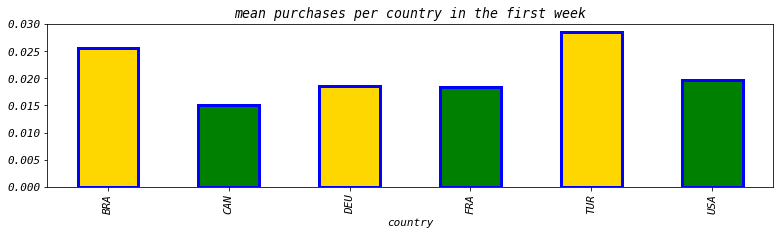

In [1518]:
grcountry_mean.plot.bar(title="mean purchases per country in the first week", edgecolor="blue",
                linewidth=3, color=['gold', 'green'], figsize=(13,3))
plt.show()

In [1519]:
grcountry_mean_ucfp = sales4.groupby(['user_registration_date', 'country'])['firstpurchase'].mean()
grcountry_mean_ucfp_df = pd.DataFrame(grcountry_mean_ucfp)
print(grcountry_mean_ucfp_df .head())
print(type(grcountry_mean_ucfp_df ))

                                   firstpurchase
user_registration_date    country               
2015-01-27 00:00:00+00:00 USA                0.0
2015-02-01 00:00:00+00:00 BRA                0.0
2015-02-09 00:00:00+00:00 USA                0.0
2015-02-10 00:00:00+00:00 USA                0.0
2015-03-01 00:00:00+00:00 USA                0.0
<class 'pandas.core.frame.DataFrame'>


In [1520]:
country_pivot = \
pd.pivot_table(grcountry_mean_ucfp_df , values=['firstpurchase'], columns=['country'], 
               index=['user_registration_date'])

In [1521]:
country_pivot.reset_index(inplace=True)
country_pivot.head()

user_registration_date firstpurchase                     
country                                     BRA CAN DEU FRA TUR  USA
0       2015-01-27 00:00:00+00:00           NaN NaN NaN NaN NaN  0.0
1       2015-02-01 00:00:00+00:00           0.0 NaN NaN NaN NaN  NaN
2       2015-02-09 00:00:00+00:00           NaN NaN NaN NaN NaN  0.0
3       2015-02-10 00:00:00+00:00           NaN NaN NaN NaN NaN  0.0
4       2015-03-01 00:00:00+00:00           NaN NaN NaN NaN NaN  0.0

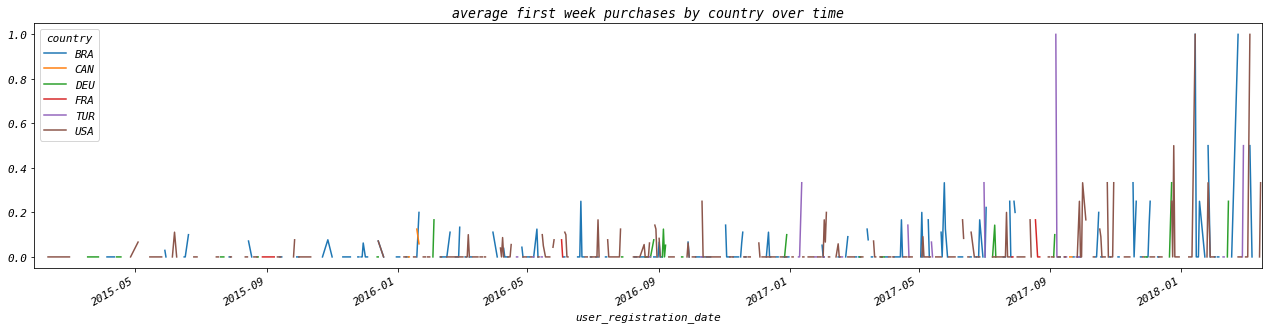

In [1522]:
country_pivot.plot(x='user_registration_date', y='firstpurchase', figsize=(22,5),
                   title="average first week purchases by country over time")
plt.show()

device
and    0.021141
iOS    0.022945
Name: firstpurchase, dtype: float64


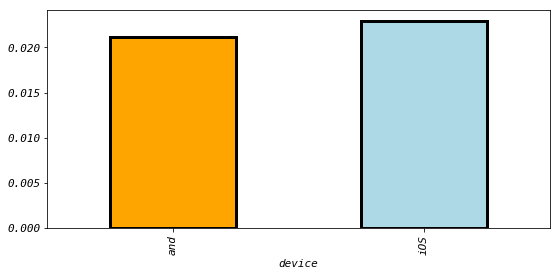

In [1523]:
sales4_grdevice = sales4.groupby(['device'])['firstpurchase']
print(sales4_grdevice)
sales4_grdevice_mean = sales4_grdevice.agg('mean')
print(sales4_grdevice_mean)
sales4_grdevice_mean.plot.bar(color=['orange', 'lightblue'], figsize=(9,4), edgecolor='black',
                              linewidth=3)
plt.show()

Slightly more in-app purchases were made with ios than android as the operating system.

In [1524]:
grdevice_mean_ucfp = sales4.groupby(['user_registration_date', 'device'])['firstpurchase'].mean()
grdevice_mean_ucfp_df = pd.DataFrame(grdevice_mean_ucfp)

print(grdevice_mean_ucfp_df.head())
print(type(grdevice_mean_ucfp_df ))

device_pivot = \
pd.pivot_table(grdevice_mean_ucfp_df , values=['firstpurchase'], columns=['device'], 
               index=['user_registration_date'])

device_pivot.reset_index(inplace=True, drop=False)
device_pivot.head()

                                  firstpurchase
user_registration_date    device               
2015-01-27 00:00:00+00:00 iOS               0.0
2015-02-01 00:00:00+00:00 and               0.0
2015-02-09 00:00:00+00:00 and               0.0
2015-02-10 00:00:00+00:00 iOS               0.0
2015-03-01 00:00:00+00:00 iOS               0.0
<class 'pandas.core.frame.DataFrame'>


user_registration_date firstpurchase     
device                                     and  iOS
0      2015-01-27 00:00:00+00:00           NaN  0.0
1      2015-02-01 00:00:00+00:00           0.0  NaN
2      2015-02-09 00:00:00+00:00           0.0  NaN
3      2015-02-10 00:00:00+00:00           NaN  0.0
4      2015-03-01 00:00:00+00:00           NaN  0.0

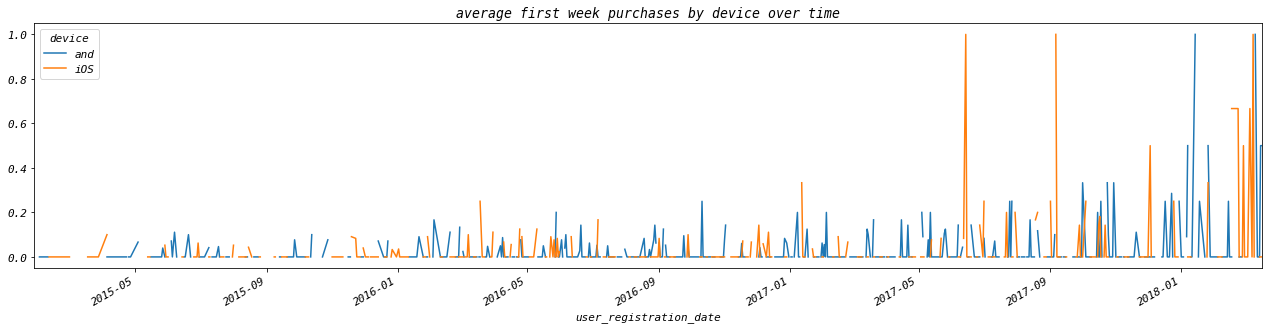

In [1525]:
device_pivot.plot(x='user_registration_date', y='firstpurchase', figsize=(22,5),
                   title="average first week purchases by device over time")
plt.show()

It appears that for both countries and devices in the in the last section from May to September, 2017 on in-app purchases
increases. This supports the claim of effective marketing measures. 

### Revenue

In [1526]:
revenues = pd.read_csv('daily_revenue.csv', sep=',', header=0, parse_dates=['date'],
                        index_col='index',
                        infer_datetime_format=True)

revenues.sort_values(by='date', inplace=True)
print(revenues.head())
print(revenues.info())
print(revenues.columns.tolist())
print(revenues.head())

       gender   device   revenue       date country
index                                              
1        male      ios  186557.0 2013-09-20     USA
1      female  android    2459.0 2013-09-20     GBR
1        male      ios   40183.0 2013-09-20     BRA
1        male  android   65071.0 2013-09-20     MEX
1      female  android   14153.0 2013-09-20     TUR
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 1 to 1200
Data columns (total 5 columns):
gender     48000 non-null object
device     48000 non-null object
revenue    48000 non-null float64
date       48000 non-null datetime64[ns]
country    48000 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.2+ MB
None
['gender', 'device', 'revenue', 'date', 'country']
       gender   device   revenue       date country
index                                              
1        male      ios  186557.0 2013-09-20     USA
1      female  android    2459.0 2013-09-20     GBR
1        male      i

In [1527]:
print(revenues.date.dtypes)
print(type(revenues.date))
print(revenues.date.min())
print(revenues.date.max())

datetime64[ns]
<class 'pandas.core.series.Series'>
2013-09-20 00:00:00
2017-01-01 00:00:00


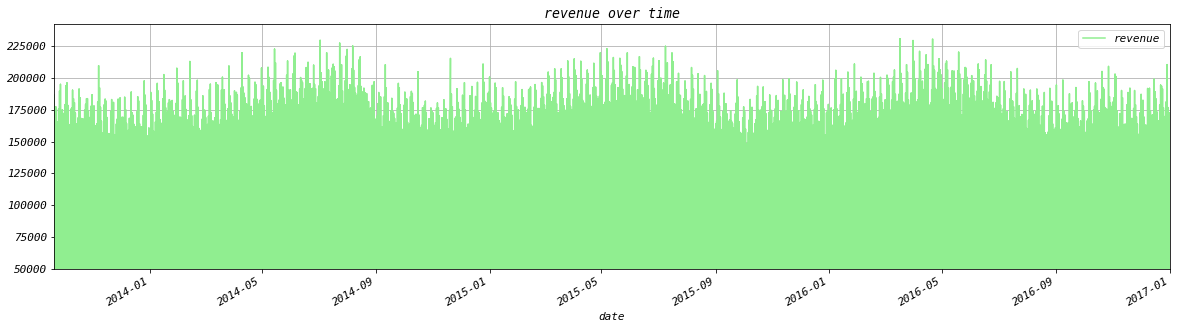

In [1528]:
revenues.plot( x='date', y='revenue', kind='line', figsize=(20,5), grid=True, color=['lightgreen'], 
              ylim=50000, title='revenue over time')
plt.show()

In [1529]:
revenues2 = revenues.copy()

In [1530]:
revenues2['weekly'] = revenues2.revenue.rolling(window=7).mean()
revenues2['2weekly'] = revenues2.revenue.rolling(window=14).mean()
revenues2['3weekly'] = revenues2.revenue.rolling(window=21).mean()
revenues2['4weekly'] = revenues2.revenue.rolling(window=28).mean()
revenues2['yearly'] = revenues2.revenue.rolling(window=365).mean()

pd.concat([revenues2['weekly'].describe().round(2), 
           revenues2['3weekly'].describe().round(2),
           revenues2['yearly'].describe().round(2)], 
           axis=1)

,weekly,3weekly,yearly
count,47994.00,47980.00,47636.00
mean,24838.95,24838.28,24842.72
std,11747.95,5837.07,1291.36
min,3532.71,9184.14,21700.76
25%,16067.21,20503.45,23844.35
50%,21824.29,24564.64,24569.77
75%,31891.61,28847.89,25906.47
max,90973.14,50152.05,28348.92


#### Rolling revenue averages

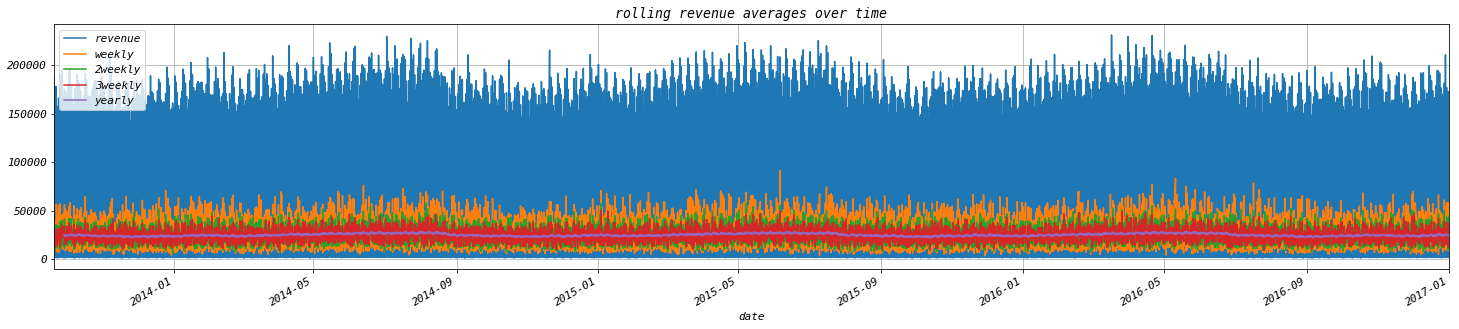

In [1531]:
revenues2.plot(x='date', y=['revenue', 'weekly',  '2weekly', '3weekly', 'yearly'], figsize=(25,5), grid=True,
               title='rolling revenue averages over time')
plt.show()

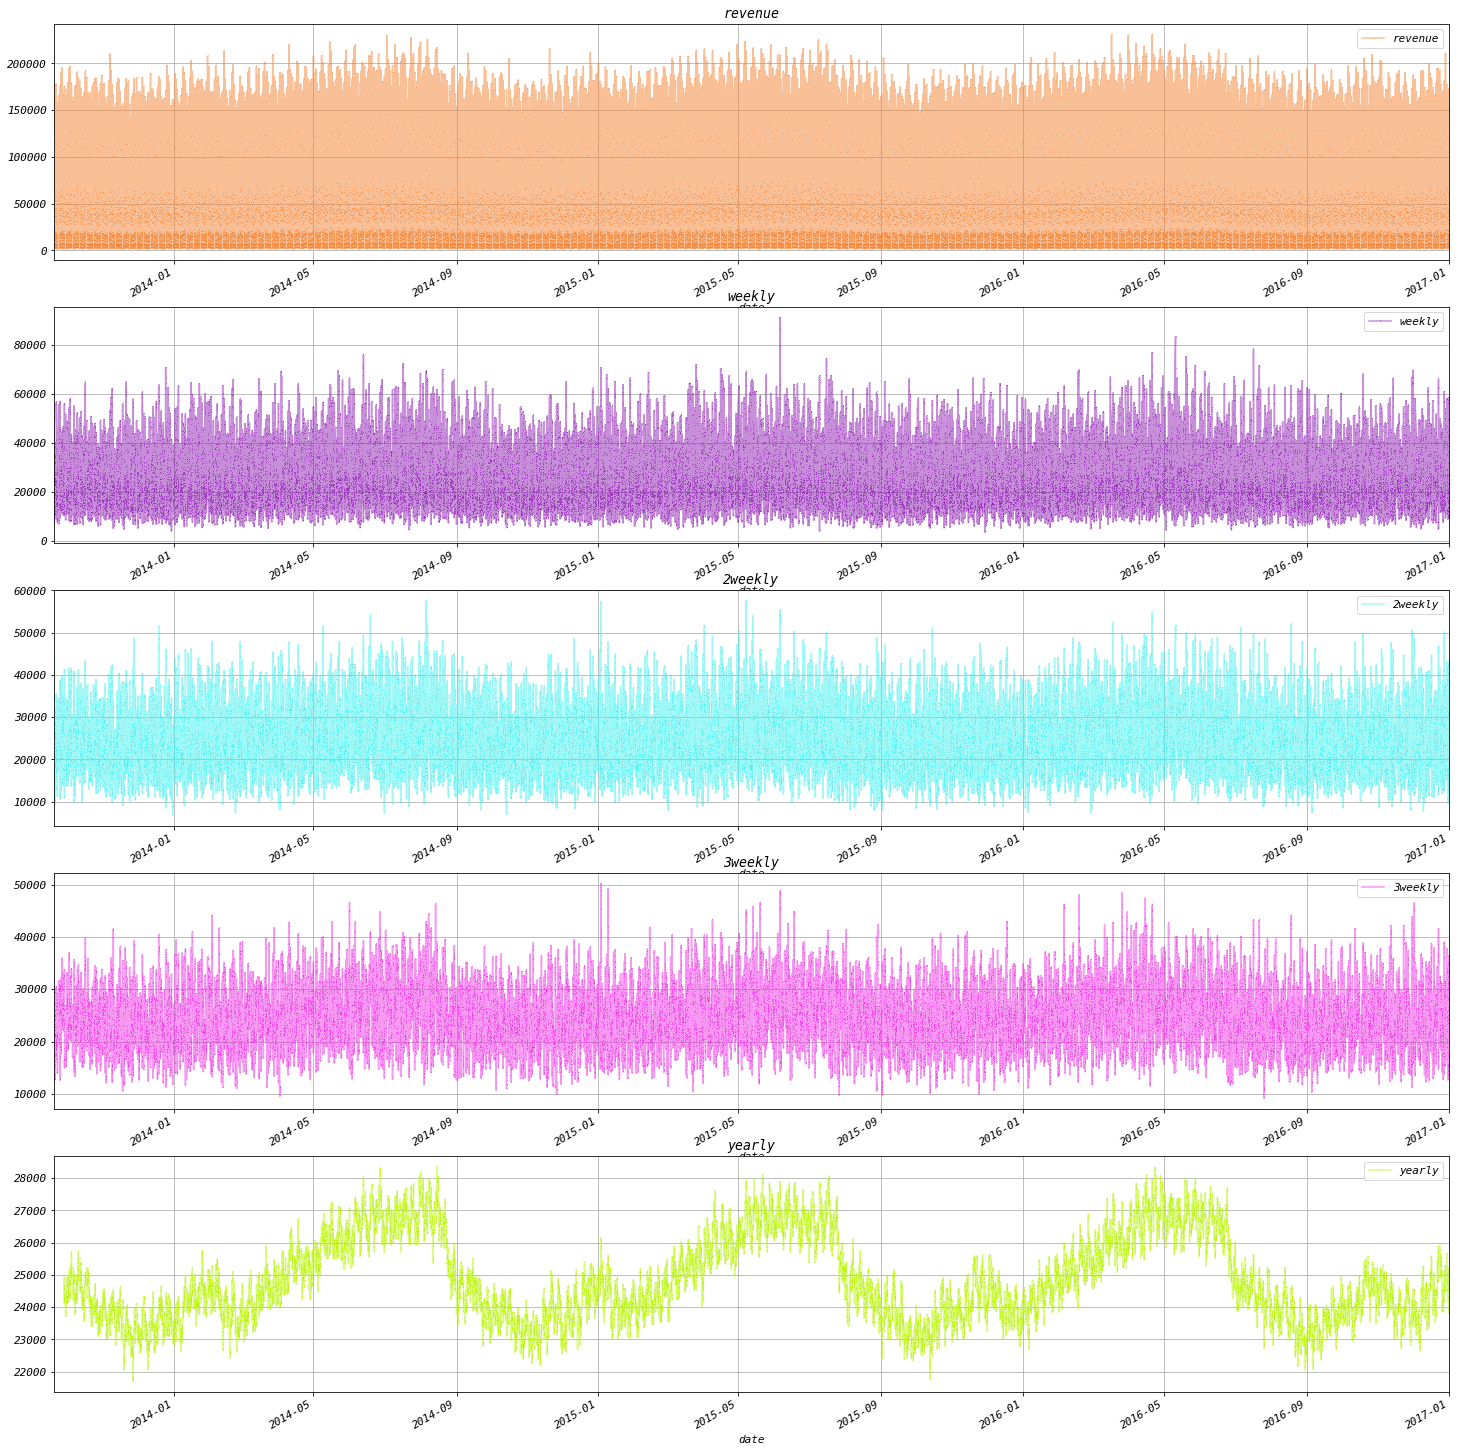

In [1532]:
rollings = ['revenue', 'weekly',  '2weekly', '3weekly', 'yearly']
fig = plt.figure(figsize=(25,5))
fig.subplots_adjust(bottom=0.1, top=4)
for rol in range(5):
    
    ax = fig.add_subplot(5,1,rol+1)
    revenues2.plot(x='date', y=[rollings[rol]], grid=True,
                   title=rollings[rol], ax=ax, 
                   color=[color_list[rol]], alpha=0.5, marker=",")
plt.show()

For ['revenue', 'weekly',  '2weekly', '3weekly'] the line is flat and trend patterns are not instantly discernible as it apparent in case of the yearly moving average. Those are not discernible because more values are there. This leads to overplotting.


#### Exponential rolling revenue averages
<p>constructed with exponential smoothing using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html">pandas.DataFrame.ewm</a> function.
</p> 

#### Forecasting: Principles and Practice: Rob J Hyndman and George Athanasopoulos
Exponential smoothing was proposed in the late 1950s (Brown, 1959; Holt, 1957; Winters, 1960), and has motivated some of the most successful forecasting methods. Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight. This framework generates reliable forecasts quickly and for a wide range of time series, which is a great advantage and of major importance to applications in industry.
</p> 

In [1533]:
# revenue subset for one in-app product
revenue_subset = pd.read_csv("revenue_subset_inapp_sales.csv" , sep=";", header=0, index_col='index',
                              parse_dates=["date"], infer_datetime_format=True)

# revenue_subset['date'] = pd.to_datetime(revenue_subset['date'] )

print(revenue_subset.info())
print(revenue_subset.head())
print(revenue_subset.date.dtype)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 2 columns):
date       1200 non-null datetime64[ns]
revenue    1200 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.1 KB
None
            date  revenue
index                    
0     2013-09-20  1034094
1     2013-09-21  1016165
2     2013-09-22   938718
3     2013-09-23   898469
4     2013-09-24   951240
datetime64[ns]


In [1534]:
# span : float, optional: Specify decay in terms of span, α=2/(span+1), for span≥
revenue_subset['10_backwards'] = revenue_subset.revenue.ewm(span=10).mean()
revenue_subset['50_backwards'] = revenue_subset.revenue.ewm(span=50).mean()
revenue_subset['100_backwards'] = revenue_subset.revenue.ewm(span=100).mean()
revenue_subset['500_backwards'] = revenue_subset.revenue.ewm(span=500).mean()

In [1535]:
print(revenue_subset.info())
print(revenue_subset.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 6 columns):
date             1200 non-null datetime64[ns]
revenue          1200 non-null int64
10_backwards     1200 non-null float64
50_backwards     1200 non-null float64
100_backwards    1200 non-null float64
500_backwards    1200 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.6 KB
None
            date  revenue  10_backwards  50_backwards  100_backwards  \
index                                                                  
0     2013-09-20  1034094    1034094.00    1034094.00    1034094.000   
1     2013-09-21  1016165    1024233.05    1024950.21    1025039.855   

       500_backwards  
index                 
0        1034094.000  
1        1025111.571  


#### Identifying seasonal trends (up and down over a time frame) and trends (up and down over the whole data range)

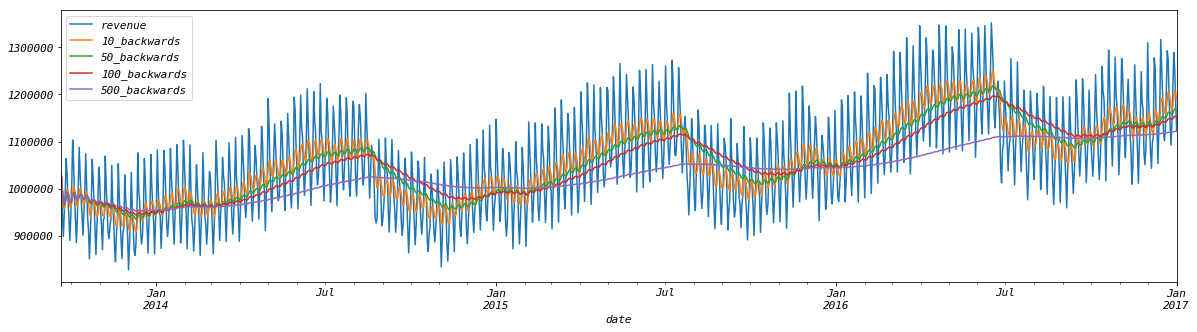

In [1536]:
revenue_subset.plot(x='date', y=revenue_subset.columns.tolist()[1:], figsize=(20,5))
plt.show()

In [1537]:
exp_means_cols = revenue_subset.columns.tolist()[1:]
print(len(exp_means_cols ))
x=revenue_subset['date']
print(x.shape)

5
(1200,)


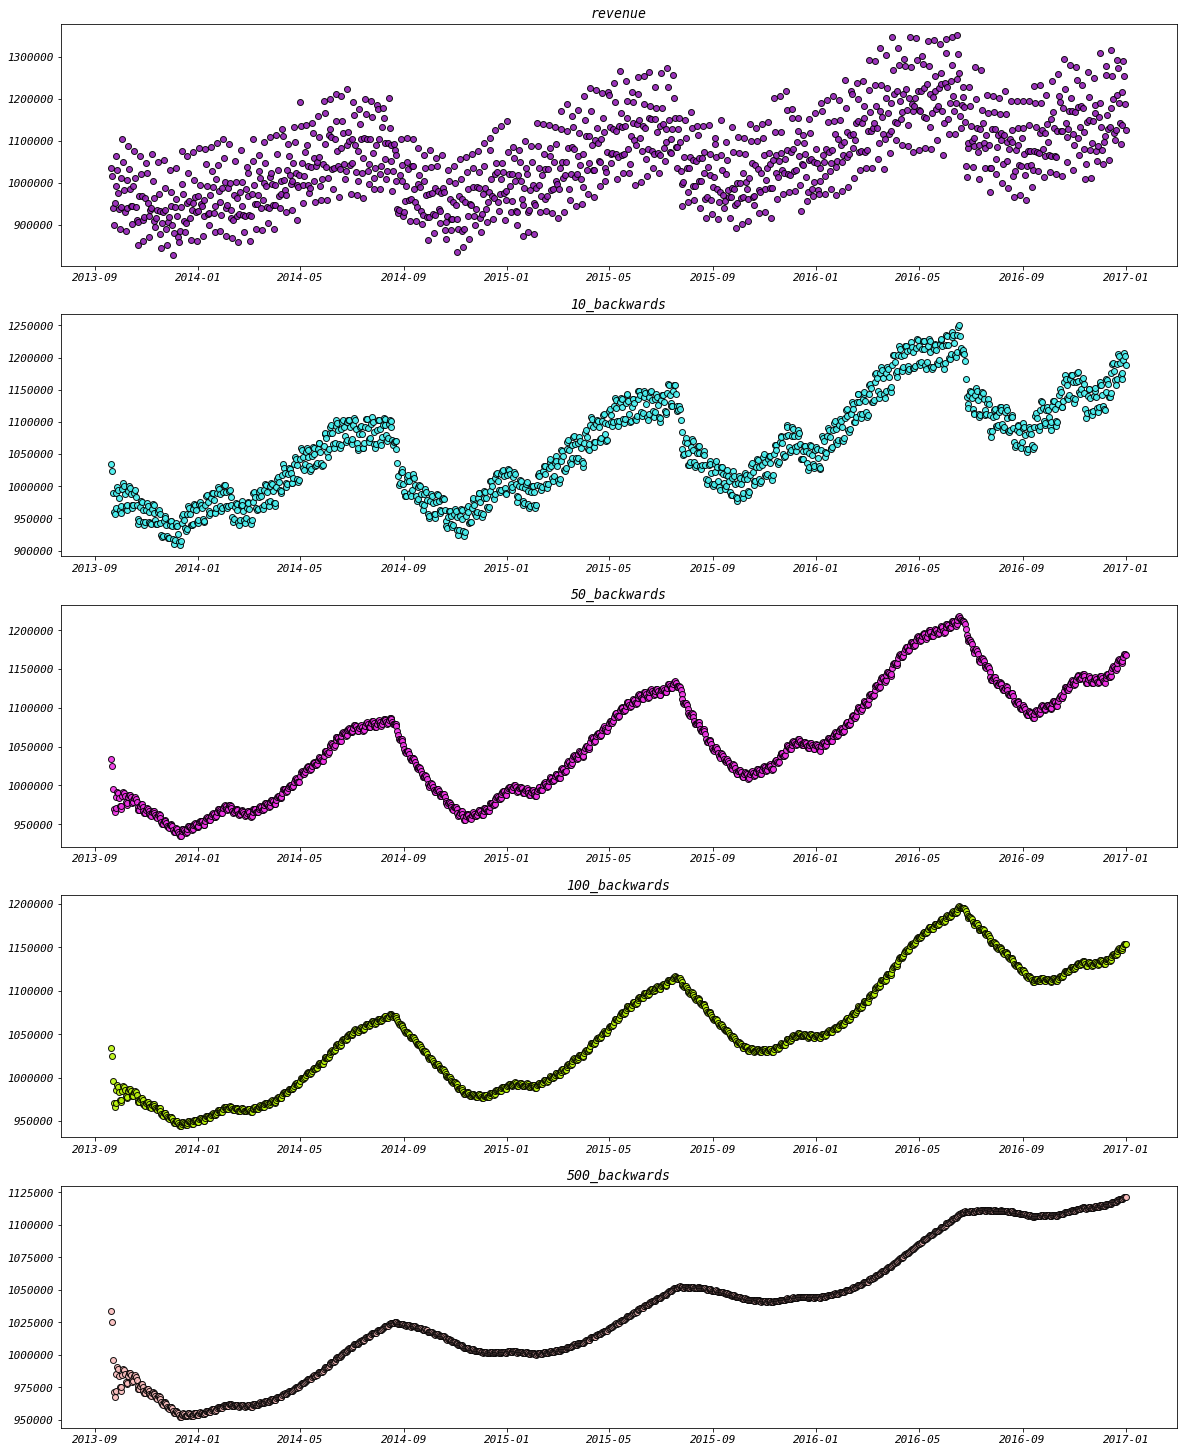

In [1538]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(bottom=0.1, top=4)

for t, (b,i) in enumerate(zip(exp_means_cols, range(1, 6))):

    
    plt.subplot(5, 1, i)
    # print(b)
    # use plt.plot_date instead plt.plot
    plt.plot_date(x=x, y=revenue_subset.loc[:,b], color=color_list[i], markeredgecolor='black',
                  markeredgewidth=1, alpha=0.9)
    plt.title(exp_means_cols[t])
plt.show()

Using a subset and exponential smooting makes the seasonal pattern 
(up and down over a time frame) and the trend (here upward positive)
discernible. This from 2013 o 2017 more revenue was generated.

In [1539]:
customerrevenue = \
pd.read_csv('customerrevenue.csv', parse_dates=['month'], header=0, 
             index_col='index',  infer_datetime_format=True, sep=";")

print(customerrevenue.head())
print(customerrevenue.info())
print(customerrevenue.describe())
print(customerrevenue.revenue.value_counts().shape)

           month  gender   device  revenue
index                                     
0     2013-01-09  female  android  1144057
1     2013-01-09  female      ios  1543801
2     2013-01-09    male  android  3447967
3     2013-01-09    male      ios  4631978
4     2013-01-10  female  android  3233420
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 4 columns):
month      164 non-null datetime64[ns]
gender     164 non-null object
device     164 non-null object
revenue    164 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ KB
None
            revenue
count  1.640000e+02
mean   7.270734e+06
std    4.144846e+06
min    9.877000e+04
25%    3.461762e+06
50%    4.666492e+06
75%    1.055730e+07
max    1.435708e+07
(164,)


device
android    float64
ios        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
device        android        ios
month                           
2013-01-10  6459342.5  8590129.5
2013-01-11  6021832.5  8062168.0
2013-01-12  6187590.5  8283639.0
2014-01-01  6494481.0  8646202.0
2014-01-02  5721774.0  7657401.5


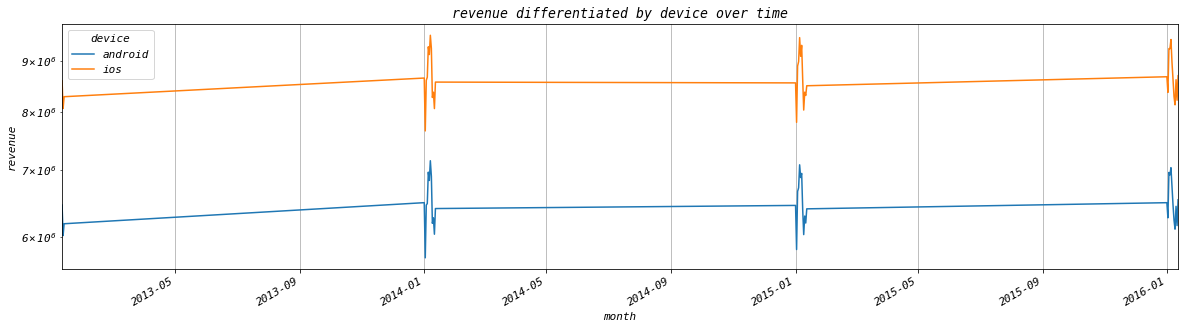

In [1540]:
pivot_device = \
pd.pivot_table(customerrevenue, values='revenue', columns='device', index='month')

# this removes the first and last line
# otherwise the proportions are distorted at the beginning
# otherwise a kind of crash would appear at the end
# the goal is to observe only the movements during the time series
# not before or after
pivot_device = pivot_device[1:(len(pivot_device) -1 )]

print(pivot_device.dtypes)
print(type(pivot_device))
print(pivot_device.head())

pivot_device.plot(figsize=(20,5), title='revenue differentiated by device over time',
                  grid=True, logy=True)
plt.ylabel('revenue')
plt.show()

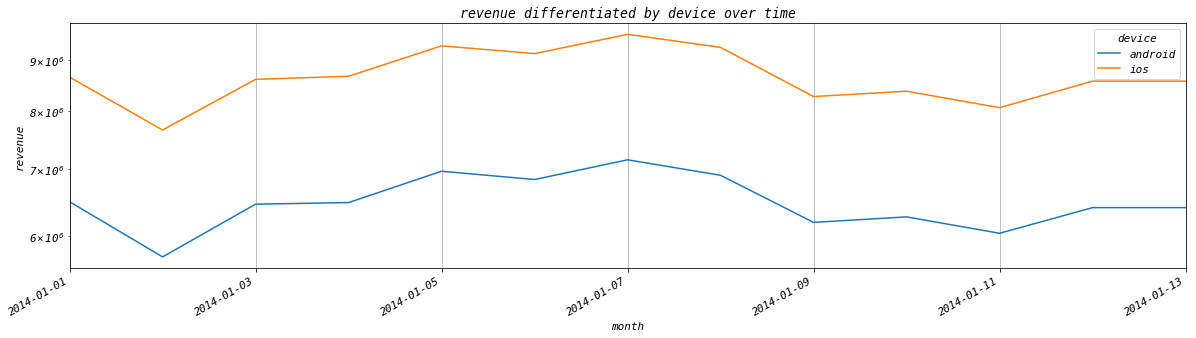

In [1541]:
pivot_device.plot(figsize=(20,5), title='revenue differentiated by device over time',
                  grid=True, xlim=('2014-01-01' , '2014-01-13' ), logy=True)
plt.ylabel('revenue')
plt.show()

gender
female    float64
male      float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
gender         female        male
month                            
2013-01-10  3789380.5  11260091.5
2013-01-11  3514110.0  10569890.5
2013-01-12  3634374.5  10836855.0
2014-01-01  3774300.0  11366383.0
2014-01-02  3330417.5  10048758.0


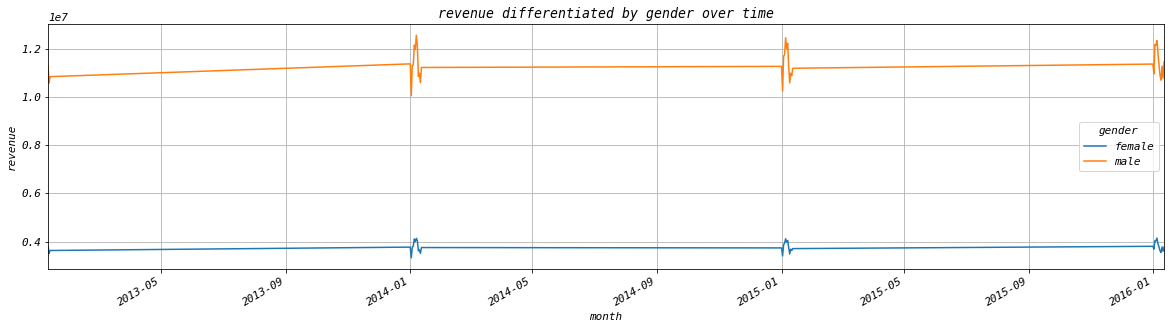

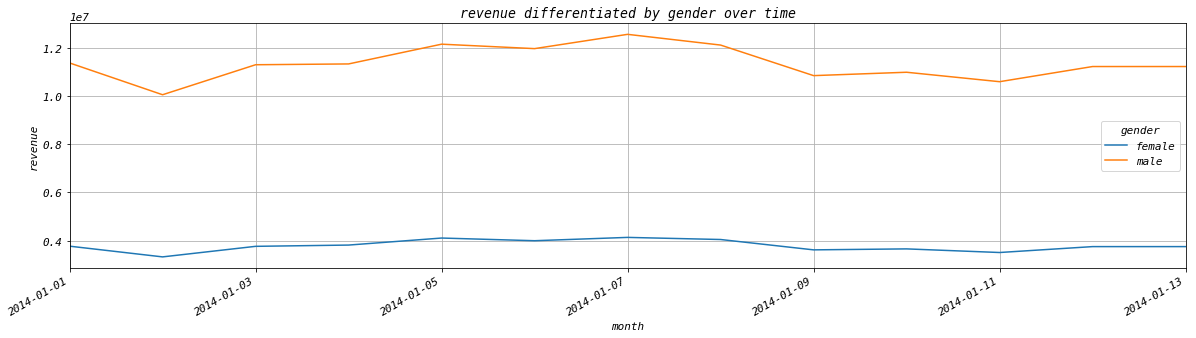

In [1542]:
pivot_gender = \
pd.pivot_table(customerrevenue, values='revenue', columns=['gender'], index='month')

# this removes the first and last line
# otherwise the proportions are distorted at the beginning
# otherwise a kind of crash would appear at the end
pivot_gender = pivot_gender[1:(len(pivot_gender) -1 )]

print(pivot_gender.dtypes)
print(type(pivot_gender))
print(pivot_gender.head())

pivot_gender.plot(figsize=(20,5), title='revenue differentiated by gender over time', grid=True)
plt.ylabel('revenue')
plt.show()

pivot_gender.plot(figsize=(20,5), title='revenue differentiated by gender over time',
                  grid=True, xlim=('2014-01-01' , '2014-01-13' ))
plt.ylabel('revenue')
plt.show()

gender  device 
female  android    int64
        ios        int64
male    android    int64
        ios        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
gender       female              male          
device      android      ios  android       ios
month                                          
2013-01-10  3233420  4345341  9685265  12834918
2013-01-11  3004144  4024076  9039521  12100260
2013-01-12  3088622  4180127  9286559  12387151
2014-01-01  3250236  4298364  9738726  12994040
2014-01-02  2851799  3809036  8591749  11505767


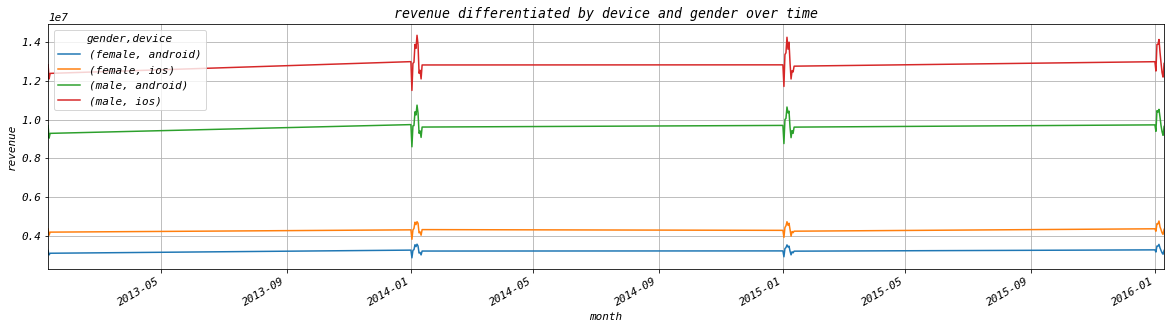

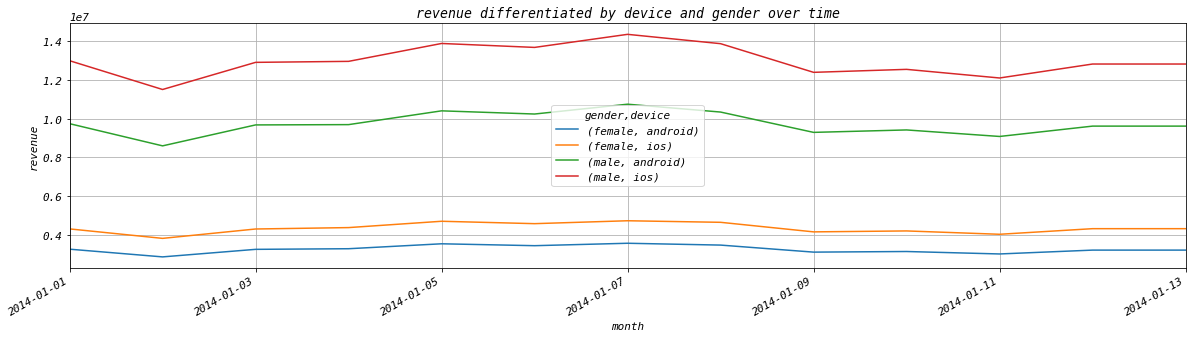

In [1543]:
pivot_both = \
pd.pivot_table(customerrevenue, values='revenue', columns=['gender', 'device'], index='month')

pivot_both= pivot_both[1:(len(pivot_gender) -1 )]


print(pivot_both.dtypes)
print(type(pivot_both))
print(pivot_both.head())

pivot_both.plot(figsize=(20,5), title='revenue differentiated by device and gender over time',
                  grid=True)
plt.ylabel('revenue')
plt.show()

pivot_both.plot(figsize=(20,5), title='revenue differentiated by device and gender over time',
                  grid=True, xlim=('2014-01-01' , '2014-01-13' ))
plt.ylabel('revenue')
plt.show()

In [1544]:
# check
print(sales.columns.tolist())
print(sales.info())

['uid', 'user_registration_date', 'device', 'gender', 'country', 'age', 'purchase_date', 'sku', 'price']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 9 columns):
uid                       9006 non-null float64
user_registration_date    9006 non-null datetime64[ns, UTC]
device                    9006 non-null object
gender                    9006 non-null object
country                   9006 non-null object
age                       9006 non-null int64
purchase_date             9006 non-null datetime64[ns, UTC]
sku                       9006 non-null object
price                     9006 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(4)
memory usage: 1023.6+ KB
None


In [1545]:
sales5ab = sales.copy()
# get the day values from the user registration date
# by perform floor operation on the data to the specified freq
sales5ab.user_registration_date = sales5ab.purchase_date.dt.floor('d')
print(sales5ab.user_registration_date.isnull().sum())

0


In [1546]:
# groupby by uid then date: hierarchial index
# dates for every user
# date
# which aggregation / statistic makes sense?
sales5ab_agg = sales5ab.groupby(['uid', 'purchase_date'], as_index=False)
# revenue per user per day
revenue_user_day = sales5ab_agg.price.mean().\
rename(columns={'price':'mean_price_per_day'})

print(revenue_user_day.head())
print(type(revenue_user_day))
print(len(revenue_user_day.uid.unique()))

          uid             purchase_date  mean_price_per_day
0  11158549.0 2017-09-25 00:00:00+00:00                 499
1  11158549.0 2017-12-02 00:00:00+00:00                 599
2  11158549.0 2018-02-11 00:00:00+00:00                 599
3  11158549.0 2018-03-13 00:00:00+00:00                 299
4  11158549.0 2018-03-16 00:00:00+00:00                 299
<class 'pandas.core.frame.DataFrame'>
1322


#### Paywall

<p>A paywall is a set of permissions granted to online customers, who are paying to move access restriction.
It is of interest for the company to understand, what kind of treatments / measures 
(offerings, incentives, dialogue, actions, colors, arrangements ...) is going to make the customer jump over this
threshold and pay.</p> 

<p>In the first step statistics and groupings of paying customers are generated.
A new data set is created for this reason.</p> 


In [1547]:
paywall = pd.read_csv('user_demographics_paywall.csv', parse_dates=['reg_date'],
                       header=0, infer_datetime_format=True)
paywall['reg_date']=pd.to_datetime(paywall['reg_date'] , utc='True')


In [1548]:
paywall.rename({'reg_date': 'user_registration_date'}, inplace=True, axis=1)
print(paywall.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
uid                       1100 non-null int64
user_registration_date    1100 non-null datetime64[ns, UTC]
device                    1100 non-null object
gender                    1100 non-null object
country                   1100 non-null object
age                       1100 non-null int64
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 51.6+ KB
None


In [1549]:
paywall.user_registration_date.head()

0   2018-03-07 00:00:00+00:00
1   2016-07-02 00:00:00+00:00
2   2017-06-05 00:00:00+00:00
3   2016-09-24 00:00:00+00:00
4   2017-06-07 00:00:00+00:00
Name: user_registration_date, dtype: datetime64[ns, UTC]

In [1550]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 9 columns):
uid                       9006 non-null float64
user_registration_date    9006 non-null datetime64[ns, UTC]
device                    9006 non-null object
gender                    9006 non-null object
country                   9006 non-null object
age                       9006 non-null int64
purchase_date             9006 non-null datetime64[ns, UTC]
sku                       9006 non-null object
price                     9006 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(4)
memory usage: 1023.6+ KB


In [1551]:
intersection_2 = \
pd.Series(list(set(paywall['uid']).intersection(set(sales['uid']))))

print(type(intersection_2))
print('len(intersection_2)', len(intersection_2))
print(intersection_2)

print("paywall['uid']", paywall['uid'].shape)
print("sales['uid']", sales['uid'].shape)


<class 'pandas.core.series.Series'>
len(intersection_2) 0
Series([], dtype: float64)
paywall['uid'] (1100,)
sales['uid'] (9006,)


In [1552]:
# Are uid's of sales and paywall equal?
# Otherwise a merge on uid would not work and produce 0.
equal_df =pd.concat([paywall['uid'], sales['uid']], axis=1, keys=['paywall_uid','sales_uid'])
print(equal_df.info())
print("equal_df.isnull", equal_df.isnull().sum())
equal_df_nonull = equal_df.dropna()
print('equal_df_nonull', equal_df_nonull.shape)

print(equal_df_nonull.head())
print(equal_df_nonull.tail())

equal_values = np.where(equal_df.paywall_uid  == equal_df.sales_uid, 1, 0)
print('equal_values', equal_values.sum() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 2 columns):
paywall_uid    1100 non-null float64
sales_uid      9006 non-null float64
dtypes: float64(2)
memory usage: 211.1 KB
None
equal_df.isnull paywall_uid    7906
sales_uid         0
dtype: int64
equal_df_nonull (1100, 2)
   paywall_uid   sales_uid
0   52774929.0  92513925.0
1   40143397.0  92513925.0
2   89856430.0  92513925.0
3   76188504.0  92513925.0
4   76493748.0  16377492.0
      paywall_uid   sales_uid
1095   78530601.0  29536399.0
1096   28505894.0  29536399.0
1097   98170020.0  69359991.0
1098   94026525.0  69359991.0
1099   32942475.0  69359991.0
equal_values 0


In [1553]:
# sales.merge(paywall, how='left', on ='uid')
sales_uid = sales.uid[0:1100].astype('int64')
print(sales_uid.head())
print(paywall['uid'].head())
print('sales_uid', sales_uid.shape)
print('paywall_uid', paywall['uid'].shape)
paywall.reset_index(inplace=True, drop=True)
paywall['uid'] = sales_uid
print(paywall['uid'].head())

0    92513925
1    92513925
2    92513925
3    92513925
4    16377492
Name: uid, dtype: int64
0    52774929
1    40143397
2    89856430
3    76188504
4    76493748
Name: uid, dtype: int64
sales_uid (1100,)
paywall_uid (1100,)
0    92513925
1    92513925
2    92513925
3    92513925
4    16377492
Name: uid, dtype: int64


In [1554]:
sales6 = sales3.copy()
sales6.drop(['user_registration_date', 'device', 'gender', 'age', 'country'], inplace=True, axis=1)

sales6['uid'] = sales6.uid.astype('int64')
print(sales6.info())
paysales = sales6.merge(paywall, how='inner', on =['uid'], right_index=True)

print(paysales.columns.tolist())
print(paysales.shape)
print(paysales.isnull().sum())

print(paysales.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 6 columns):
uid                9006 non-null int64
purchase_date      9006 non-null datetime64[ns, UTC]
sku                9006 non-null object
price              9006 non-null int64
price_one_month    608 non-null float64
firstpurchase      9006 non-null int32
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), int64(2), object(1)
memory usage: 457.3+ KB
None
['uid', 'purchase_date', 'sku', 'price', 'price_one_month', 'firstpurchase', 'user_registration_date', 'device', 'gender', 'country', 'age']
(10932, 11)
uid                           0
purchase_date                 0
sku                           0
price                         0
price_one_month           10300
firstpurchase                 0
user_registration_date        0
device                        0
gender                        0
country                       0
age                           0
dtype: int64
        uid            

#### Conversion rate 

<p>
considers users, who have subscribed at one point in time but is then challenged to make decisions about buying additional services. The users are facing a paywall. How many users of all users facing the paywall are going to make the decision to pay for additional services? The fraction of users paying in relation to all users is called the 
conversion rate in this case.
</p> 

In [1555]:

daily_paysales = paysales.groupby(by=['purchase_date'], as_index=False)

daily_paysales_sum= daily_paysales.firstpurchase.sum()
daily_paysales_sum_sum=daily_paysales_sum.sum()[0]
daily_paysales_sum_mean = daily_paysales_sum.mean()[0]
daily_paysales_increased=daily_paysales_sum_mean * 1000

print(daily_paysales_sum.head())
print('daily_paysales_sum_mean:', daily_paysales_sum_mean)
print('daily_paysales_sum_sum:' , daily_paysales_sum_sum)
print('daily_paysales_increased:',daily_paysales_increased)


              purchase_date  firstpurchase
0 2015-05-09 00:00:00+00:00              0
1 2015-05-28 00:00:00+00:00              0
2 2015-05-31 00:00:00+00:00              0
3 2015-06-16 00:00:00+00:00              0
4 2015-06-22 00:00:00+00:00              0
daily_paysales_sum_mean: 0.2517482517482518
daily_paysales_sum_sum: 144
daily_paysales_increased: 251.74825174825176


In [1556]:
dpay_views_count = daily_paysales.firstpurchase.count()
dpay_views_mean = dpay_views_count.mean()[0]
dpay_views_increased = dpay_views_mean*1000

print(dpay_views_count.head())
print('dpay_views_mean:', dpay_views_mean)
print('dpay_views_increased:', dpay_views_increased)


              purchase_date  firstpurchase
0 2015-05-09 00:00:00+00:00             16
1 2015-05-28 00:00:00+00:00             10
2 2015-05-31 00:00:00+00:00             19
3 2015-06-16 00:00:00+00:00             15
4 2015-06-22 00:00:00+00:00             15
dpay_views_mean: 19.111888111888113
dpay_views_increased: 19111.888111888115


In [1557]:
conversion_rate = round(paysales.firstpurchase.sum() / paysales.firstpurchase.count(), 4)
print(conversion_rate )

0.0132


#### Sensitivity

<p>
The response variable is the variable we test for change on ground of an independent feature variable.
Paying for service is such a response variable.
Given a sample of n = 1.000 users at the paywall asked for payment for a service 
how many will pay. A price discount can be the independent feature variable (or a simple change in text, or
any other marketing element).
How much discount will lead to how much change in paying customers and a change in the payment sum?
The change in the response variable is called the sensitivity.</p> 
<p>
What percent in change would be meaningful to detect in our response variable?
Which sensitivity or change in the response variable due to treatment is desirable?
A higher chance is preferable of course, but is it realistic?
The change in the response variable can be distorted due to variability.
The derived conversion rate are used to create absolute numbers of users facing the paywall, 
who became converted.
</p> 

In [1558]:
sensitivity_minor = 0.1 

# Conversion rate with a growth factor of 0.1
minor_conversion_rate = round(conversion_rate * (1 + sensitivity_minor), 4)
print('minor_conversion_rate:' , minor_conversion_rate)

# increase in the number of paying customers
minor_customerchange = (dpay_views_mean * minor_conversion_rate)

print('minor_customerchange:', minor_customerchange)
print('daily_paysales_sum_mean:', daily_paysales_sum_mean)

# difference between customer change due to senstivity of 0.1 and given customers at the paywall
customer_lift_minor = (minor_customerchange - daily_paysales_sum_mean)

# print(type(customer_lift_minor))
print('customer_lift_minor:', customer_lift_minor)

minor_conversion_rate: 0.0145
minor_customerchange: 0.2771223776223777
daily_paysales_sum_mean: 0.2517482517482518
customer_lift_minor: 0.025374125874125908


In [1559]:
sensitivity_moderate = 0.2

# Conversion rate with a growth factor of 0.1
moderate_conversion_rate = round(conversion_rate * (1 + sensitivity_moderate), 4)
print('moderate_conversion_rate:' , moderate_conversion_rate)

# increase in the number of paying customers
moderate_customerchange = (dpay_views_mean * moderate_conversion_rate)

print('moderate_customerchange:', moderate_customerchange)
print('daily_paysales_sum_mean:', daily_paysales_sum_mean)

# difference between customer change due to senstivity of 0.1 and given customers at the paywall
customer_lift_moderate = (moderate_customerchange - daily_paysales_sum_mean)

# print(type(customer_lift_01))
print('customer_lift_moderate:', customer_lift_moderate)

moderate_conversion_rate: 0.0158
moderate_customerchange: 0.30196783216783224
daily_paysales_sum_mean: 0.2517482517482518
customer_lift_moderate: 0.05021958041958047


In [1560]:
sensitivity_big = 0.5

# Conversion rate with a growth factor of 0.1
big_conversion_rate = round(conversion_rate * (1 + sensitivity_big), 4)
print('big_conversion_rate:' , big_conversion_rate)

# increase in the number of paying customers
big_customerchange = (dpay_views_mean * big_conversion_rate)

print('big_customerchange:', big_customerchange)
print('daily_paysales_sum_mean:', daily_paysales_sum_mean)

# difference between customer change due to senstivity of 0.1 and given customers at the paywall
customer_lift_big = (big_customerchange - daily_paysales_sum_mean)

# print(type(customer_lift_01))
print('customer_lift_big:', customer_lift_big)

big_conversion_rate: 0.0198
big_customerchange: 0.37841538461538465
daily_paysales_sum_mean: 0.2517482517482518
customer_lift_big: 0.12666713286713288


In [1561]:
# number of customers facing the paywall
n_1 = paysales.uid.count()
print('number of customers facing the paywall:' , n_1)

# fraction of customers facing the paywall not converting
conversionrate_reversed = 1-conversion_rate
print('fraction of customers facing the paywall not converting:' , conversionrate_reversed)

conversionrate_v  = conversion_rate * conversionrate_reversed

variance_1 = conversionrate_v / paysales.shape[0]
print('variance:' , variance_1)

# significance level: 0.05
standarderror_1 = variance_1 ** 0.5
print('standarderror', standarderror_1 )

number of customers facing the paywall: 10932
fraction of customers facing the paywall not converting: 0.9868
variance: 1.1915257958287597e-06
standarderror 0.0010915703348061269


#### Statistical power and sample size

<p>
refers to the probability to detect the presence of a true statistical effect.
In this case, is the change in paying customers, when facing the paywall a true effect of statistical
significance or not. 
</p>
<p>
<b>The reasoning behind:</b>
The null is false and is correctly rejected: true negatives.
The null is true but not correctly rejected: false negatives.
The power of the hypothesis test is based on correctly rejecting the null hypothesis, when the null is not true,
and maybe the alternative is true.
Ergo, the greater the power the smaller the number of false negatives.
</p>
    
Power is also used to estimate the sample size necessary to make valid conclusions
about the effect. This common use is applied here.
</p> 
<a href="https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/">Visit A Gentle Introduction to Statistical Power and Power Analysis in Python</a> 

In [1562]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
# difference of means of two groups in terms of standard deviations
effect = 0.5
# significance level
alpha = 0.05
# see above
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 63.766


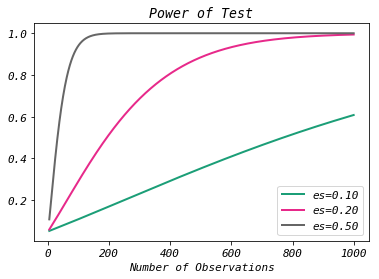

In [1563]:
# parameters for power analysis
effect_sizes = np.array([0.1, 0.2, 0.5])
sample_sizes = np.array(range(5, 1000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

The impact on statistical power or the propability of rejecting the null-hypothesis when the alternative 
hypothesis is true for three different levels of sensitivity. For a sensitivity of 0.5 the power does
not increase after ca. 180 observations. 

### Utilization of AB-testing

<p>
A/B testing (also known as bucket tests or split-run testing) is a randomized experiment with two variants, A and B.It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.
</p>
<p>
<a href="https://en.wikipedia.org/wiki/A/B_testing">Wikipedia: A/B testing</a> 
</p>

<p>
The two variants A and B are different two kinds of purchase data created by a special treatment (e.g. text element, discount ...) at a paywall for the test group and no treatment for the control group. A text could be:
"Buy now for 10 minutes for 10 percent discount."
Is the behavorial reaction or paying for services to open the paywall different between treatment and control
group or are both groups are paying on average the same? If the mean payment of both groups is statistical similar than the null-hypothesis is not rejected and both groups belong to the same population. On the other
hand if not than the means of both groups are assumed statistical different and the null is rejected.
In practical terms as a user experience designer this would be the preferable outcome of course.
The test to examine the statistical significance use here is the Student's T-test.
</p>

In [1564]:
# load in the data
abtest = pd.read_csv('abtest.csv', header=0, parse_dates=['date'], infer_datetime_format=True)

In [1565]:
print(abtest.info())
print(abtest.shape)
print(abtest.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 8 columns):
uid          45883 non-null int64
country      45883 non-null object
gender       45883 non-null object
spent        45883 non-null int64
purchases    45883 non-null int64
date         45883 non-null datetime64[ns]
group        45883 non-null object
device       45883 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.8+ MB
None
(45883, 8)
        uid country gender  spent  purchases       date  group device
0  11115722     MEX      F   1595          5 2016-03-08  GRP B      I
1  11122053     USA      M    498          2 2017-07-14  GRP B      I
2  11128688     USA      F   2394          6 2017-09-17  GRP A      I
3  11130578     USA      F   1197          3 2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3 2018-01-10  GRP B      A


We have 45883 observations. With regard to the sample size to achieve statistical power this is a
good sufficient number.

In [1566]:
# uid is an identifier
print(len(abtest.uid))
print(len(abtest.uid.unique()))
# there are not any null values in the purchases column
print(abtest.purchases.unique())
print(abtest[abtest.purchases==0].shape[0])

45883
45883
[ 5  2  6  3  4  7 10  8  1  9 11 12 13 19 14 16 15 17 24 20 21 18 23 22
 30 25]
0


#### Does the groups and subgroups have roughly similar sizes?

<p>This would make the statistical testing more easy.</p> 

In [1567]:
# user (uid) is in the test (treatment) group or the control group (without treatment)
print(abtest.group.value_counts())
print(abtest.groupby('group', as_index=False)['uid'].count())

GRP A    23009
GRP B    22874
Name: group, dtype: int64
   group    uid
0  GRP A  23009
1  GRP B  22874


In [1568]:
abdemographics = abtest.groupby(['country', 'gender', 'device' , 'group'])['uid'].count()
print(abdemographics.head())
# the groups and subgroups have roughly similar sizes!

country  gender  device  group
AUS      F       A       GRP A    134
                         GRP B    130
                 I       GRP A    130
                         GRP B    133
         M       A       GRP A    133
Name: uid, dtype: int64


In [1569]:
print(abtest.purchases.unique())

[ 5  2  6  3  4  7 10  8  1  9 11 12 13 19 14 16 15 17 24 20 21 18 23 22
 30 25]


In [1570]:
abgroup = abtest.groupby(by=['group'], as_index='False')
abagg = abgroup.agg({'purchases': ['count' ,'sum']})
print(abagg )

      purchases        
          count     sum
group                  
GRP A     23009  104377
GRP B     22874  104133


In [1571]:
groupsize = abtest.groupby('group').agg({'uid':pd.Series.nunique})
print(groupsize)

         uid
group       
GRP A  23009
GRP B  22874


In [1572]:
groupsize_percent = groupsize / len(abtest.uid.unique())*100
groupsize_percent

,uid
group,
GRP A,50.147113
GRP B,49.852887


In [1573]:
subgroupsize = abtest.groupby(['group' , 'gender' , 'device']).agg({'uid': pd.Series.nunique})
print(subgroupsize )

subgroupsize_percent = subgroupsize / len(abtest.uid.unique())*100
print(subgroupsize_percent)

                      uid
group gender device      
GRP A F      A       5616
             I       5755
      M      A       5871
             I       5767
GRP B F      A       5760
             I       5636
      M      A       5735
             I       5743
                           uid
group gender device           
GRP A F      A       12.239827
             I       12.542772
      M      A       12.795589
             I       12.568925
GRP B F      A       12.553669
             I       12.283417
      M      A       12.499183
             I       12.516618


The percentage in each group looks very similar.

### Conducting a Student T-test for independent samples

<p>
testing of two samples are drawn for the same population by calculating 
the standard error in the difference of the sample means and making than estimations about the
probability under the null-hypothesis, which is simply, that there is no difference between the means.
</p> 
<a href="https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/">How to Code the Student’s t-Test from Scratch in Python</a> 

#### Assumptions of normality

Citing <a href="https://www,w3schools,com"> Wikipedia</a> the t-test makes these assumptions:

<ul>
<li>The means of the two populations being compared should follow normal distributions.
</li>
<li>If using Student's original definition of the t-test, the two populations being compared should have the same variance.
</li>
<li>The data used to carry out the test should be sampled independently from the two populations being compared.
</li>
</ul>

Ideally the distribution should look like the normal distribution below.


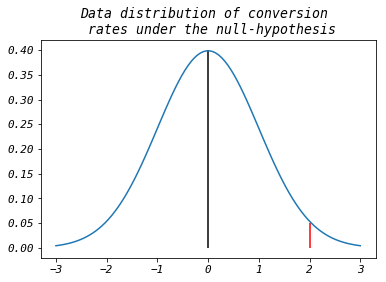

In [1574]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.vlines(0,0,0.40)
plt.vlines(2,0,0.05, color='r')
plt.title('Data distribution of conversion \n rates under the null-hypothesis')
plt.show()

In particular the assumption normality is now objected to scrutiny. Let's first have look at
the distribution of the raw data for the two groups.

In [1575]:
abtest.group.value_counts()
abtest.group.unique()
abtest.group.head()

abtest_2 = abtest.copy()
abtest_2 = abtest_2.replace({'GRP B': 'B' , 'GRP A': 'A'})

print(abtest_2.group.unique())

adata = abtest_2[abtest_2.group == 'A']
# check
print(adata.shape)
print(adata.group.unique())
print(adata.columns.to_list())

bdata = abtest_2[abtest_2.group == 'B']
# check
print(bdata.shape)
print(bdata.group.unique())
print(bdata.columns.to_list())

['B' 'A']
(23009, 8)
['A']
['uid', 'country', 'gender', 'spent', 'purchases', 'date', 'group', 'device']
(22874, 8)
['B']
['uid', 'country', 'gender', 'spent', 'purchases', 'date', 'group', 'device']


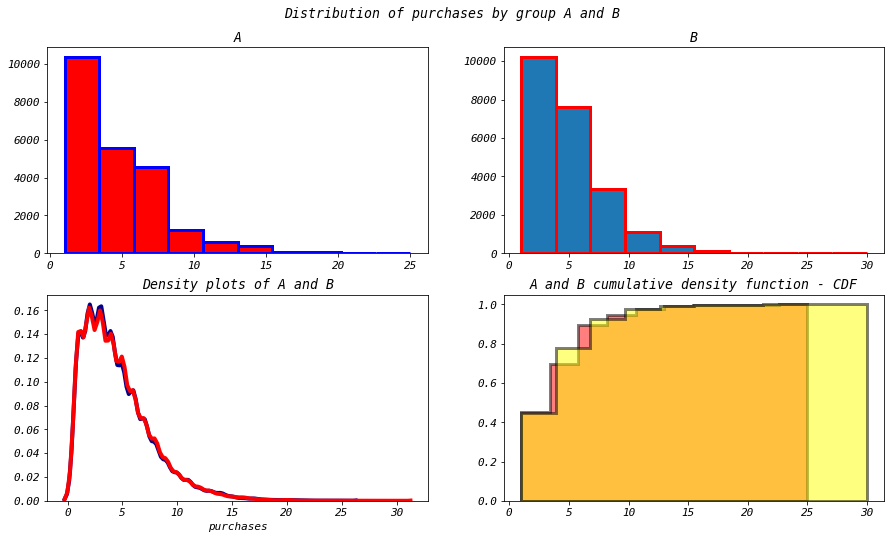

In [1576]:
fig=plt.figure(figsize=(15,7))
plt.suptitle('Distribution of purchases by group A and B')
fig.subplots_adjust(top=0.9, bottom=0.0)

fig.add_subplot(2,2,1)
plt.hist(apur, color='r', edgecolor='b', linewidth=3)
plt.title('A')

fig.add_subplot(2,2,2)
plt.hist(bpur, edgecolor='r', linewidth=3)
plt.title('B')

fig.add_subplot(2,2,3)

sns.distplot(apur, hist=False, kde=True, 
             color = 'darkblue', 
             kde_kws={'linewidth': 4, "alpha": 2})

sns.distplot(bpur, hist=False, kde=True, 
             color = 'red', 
             kde_kws={'linewidth': 4, "alpha": 4})
plt.title('Density plots of A and B')

fig.add_subplot(2,2,4)
kwargs = dict(alpha=0.5, stacked=True)
plt.hist(apur,  **kwargs, color='red', edgecolor='black', linewidth=3, density=True, cumulative=True,  
         histtype='stepfilled')
plt.hist(bpur,  **kwargs , color='yellow', edgecolor='black', linewidth=3, density=True, cumulative=True,
         histtype='stepfilled')
plt.title('A and B cumulative density function - CDF')

plt.show()



<p>
The distributions are highly skwewed to the right. Jumping to conclusions
this could lead to oppinion that the assumption of normality is violated
and the t-test cannot be applied.
</p> 

<p>
Taking a closer at the assumption (by Wikipedia):
</p> 
<p>
"The means of the two populations being compared should follow normal distributions. 
Under weak assumptions, this follows in large samples from the central limit theorem, 
even when the distribution of observations in each group is non-normal."
</p> 

<p>
The assumption of normality relates to the means of the two populations and not the raw
data. Of course at this point there are no distributions given but merely one mean per group.
The statistics in the underlying populations are unknown. In this case the concept of
the sampling distribution can be applied. The sampling distribution is
the probability distribution of the values that the statistic takes on.
Taking samples a number of times from the raw data and computing the mean-statistics
for each sample creates a sampling distribution <a href="https://en.wikipedia.org/wiki/Sampling_distribution">Wiki: sampling distribution.</a>
</p> 

<p>The sampling distribution is combined with the central limit theorem:</p> 
In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 
<a href="https://en.wikipedia.org/wiki/Central_limit_theorem">Wiki: Central limit theorem.</a>
</p> 

<p>Programming languages like Python and R offer convinient ways to test
the CLT by generating sampling distributions.This is shown below for different raw data sets.</p> 

#### Generating sampling distributions and checking for the central limit theorem step-by-step

In [1577]:
# Starting out with the complete purchase variable not grouped by A and B
abpur = abtest.purchases

# Taking a sample of size 100 from apur
sample_1000 =  np.random.choice(abpur, size=1000, replace=True, p=None)

print(sample_1000.shape)
print(type(sample_1000))
print(sample_1000.dtype)

# This gives one mean for the given apur data
np.mean(sample_1000)

(1000,)
<class 'numpy.ndarray'>
int64


4.52

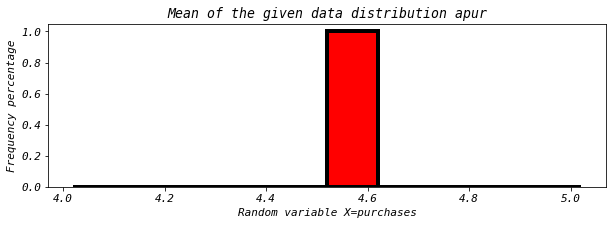

In [1578]:
# plotting a histogram to show the distribution
fig = plt.figure(figsize=(10,3))
plt.hist(np.mean(sample_1000), color='r', edgecolor='black', linewidth=4)
plt.title('Mean of the given data distribution apur')
plt.xlabel('Random variable X=purchases')
plt.ylabel('Frequency percentage')
plt.show()
# This looks of course not like a normal distribution

In [1579]:
# Now taking 1000 sam
sampling_means_size_100 = []

seed(10)
for i in range(100):
    
    sampling =  np.random.choice(abpur, size=100, replace=True, p=None)
    sampling_mean = np.mean(sampling)
    sampling_means_size_100.append(sampling_mean)
    

print(len(sampling_means_size_100))

100


In [1603]:
def make_hist(variable, color):
    fig = plt.figure(figsize=(10,3))
    plt.hist(variable, color=color, edgecolor='black', linewidth=4)
    plt.title('Sampling distribution')
    plt.xlabel('Random variable X')
    plt.ylabel('Frequency')
    plt.show()


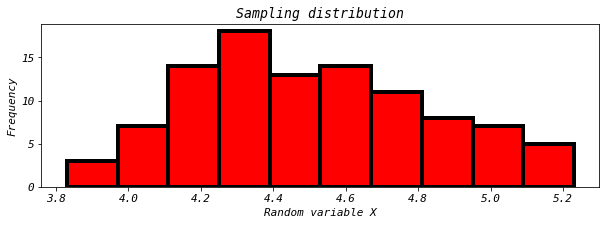

In [1604]:
make_hist(sampling_means_size_100, 'red')


This does not look like a normal distribution. Are different number of sample means and
samples of other size are going to make the distribution more 'normal' aligned
with the CLT?

In [1582]:

def sampling_distribution(rawdata, n_means, sample_size):
    
    sampling_means = []
    seed(10)
    for i in range(n_means):
        sampling =  np.random.choice(rawdata, size=sample_size, replace=True, p=None)
        sampling_mean = np.mean(sampling)
        sampling_means.append(sampling_mean)

    
    return sampling_means
    


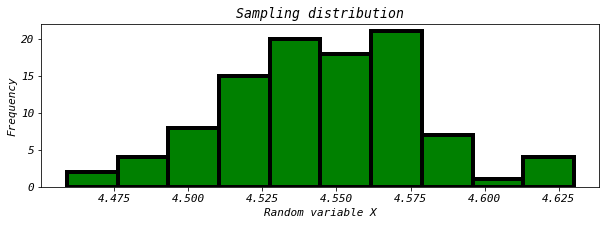

In [1605]:
# making a sampling distribution of 100 means taking from samples of size 10.000
sampling_means_100 = sampling_distribution(abpur, 100, 10000)
make_hist(sampling_means_100, 'green')

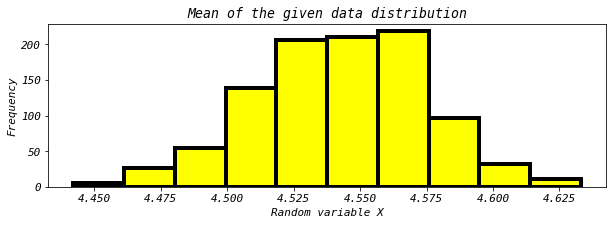

In [1584]:
# making a sampling distribution of 1000 means taking from samples of size 10.000
sampling_means_1000 = sampling_distribution(abpur, 1000, 10000)
make_hist(sampling_means_1000, 'yellow')

This looks more normal.

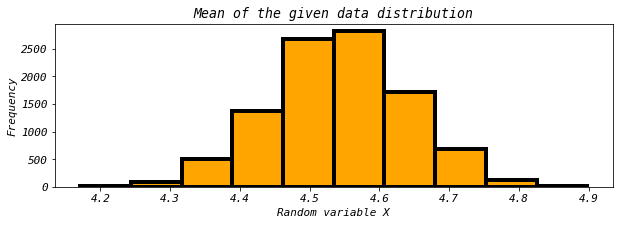

In [1585]:
# making a sampling distribution of 10.000 means taking from samples of size 1000
sampling_means_10000 = sampling_distribution(abpur, 10000, 1000)
make_hist(sampling_means_10000, 'orange')

Even more normal. Increasing the number of means taken from the samples gives better results than
the increasing the size of the samples. 

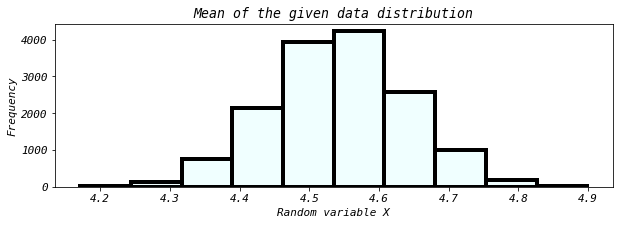

In [1586]:
# making a sampling distribution of 15.000 means taking from samples of size 10.000
sampling_means_15000 = sampling_distribution(abpur, 15000, 1000)
make_hist(sampling_means_15000, 'azure')

A little bit more normal as the mean of 4.550 is now higher than 4.525.
Now the sample distributions of the purchase variable grouped by A and B are considered.

In [1587]:
print(adata.shape)

(23009, 8)


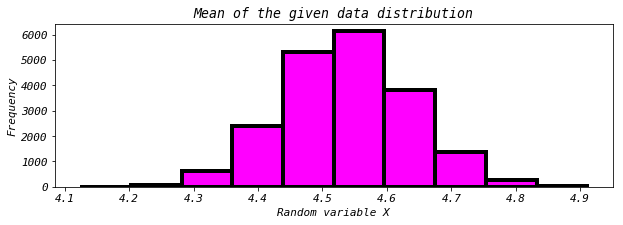

In [1588]:
sampling_means_adata_1= sampling_distribution(apur, 20000, 1000)
make_hist(sampling_means_adata_1, 'magenta')

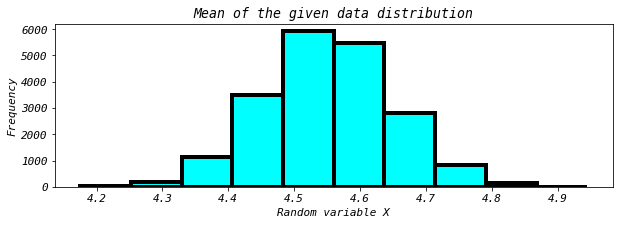

In [1589]:
sampling_means_bdata_1= sampling_distribution(bpur, 20000, 1000)
make_hist(sampling_means_bdata_1, 'cyan')

As shown with the sampling distributions generated the central limit theorems hold 
and the t-test can be applied.

#### Doing the T-test step by step

<p>with a significance level alpha of 0.05.</p> 
<p>For a better understanding the ideal normal distribution is shown again.</p> 


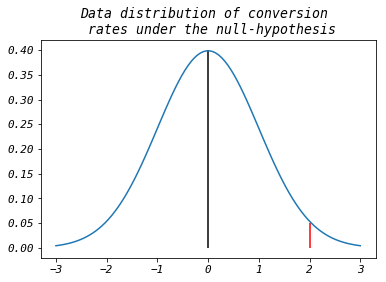

In [1590]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.vlines(0,0,0.40)
plt.vlines(2,0,0.05, color='r')
plt.title('Data distribution of conversion \n rates under the null-hypothesis')
plt.show()



<p>
The pvalue is the probability of observing a value as or as more extreme than the one observed
under the null-hypothesis.
The term "extreme" depends on the significance level (0.1, 0.05 , 0.05) alpha here represented by a red line.
</p>
<p>
The pvalue is left to the red line in the big area of the bell shape null distribution.
This probability is therefore high to observe this value under the null.
In case it is right to the red line the value is extreme and highly unlikely under the null
and the null is rejected and the alternative hypothesis is considered. 
In this case the users make the decision to buy due to the discount.
</p>

#### Doing the T-test step by step

<p>with a significance level alpha of 0.05.</p> 

In [1591]:
apur = adata.purchases[:22874].reset_index(drop=True)
bpur = bdata.purchases.reset_index(drop=True)
print('apur shape', apur.shape)
print('bpur shape', bpur.shape)
dpur = abs(apur-bpur)

apur shape (22874,)
bpur shape (22874,)


In [1592]:
mean1, mean2 = np.mean(apur), np.mean(bpur)
print(mean1)
print(mean2)

4.536416892541751
4.552461309784034


In [1593]:
std1, std2 = np.std(apur, ddof=1), np.std(bpur,ddof=1)
print(std1)
print(std2)

3.110676255904887
3.0941417861128064


In [1594]:
na, nb = len(apur), len(bpur)
errora, errorb = std1 / np.sqrt(na), std2 / np.sqrt(nb)
print(errora, errorb)

0.02056760654882055 0.020458281617133648


In [1595]:
betweensampleerror = np.sqrt(errora**2 + errorb**2)
print(betweensampleerror)

0.029009786725741962


In [1596]:
t_stat = (mean1 - mean2) / betweensampleerror 
print(t_stat)

-0.5530691209131245


In [1597]:
degreesoffreedom = na + nb - 2
print(degreesoffreedom)

45746


In [1598]:
from scipy.stats import t
alpha = 0.05
criticalvalue = t.ppf(1.0 - alpha, degreesoffreedom)
print(criticalvalue)

1.644886936971877


In [1599]:
# calculate the p-value
pvalue = (1 - t.cdf(abs(t_stat), degreesoffreedom)) * 2
print(pvalue)

0.5802187828984584


#### Check the statistical significance with the p-value and the significance level.

In [1600]:
if pvalue > 0.05:
    print("The null is not rejected and the means belong to the same population.")
else:
    print("The null is rejected and the means belong to different populations.")

The null is not rejected and the means belong to the same population.


#### Check the statistical significance with the t-statistic and the critical value.

In [1601]:
if abs(t_stat) <= criticalvalue:
    print("The null is not rejected and the means belong to the same population.")
else:
    print("The null is rejected and the means belong to different populations.")

The null is not rejected and the means belong to the same population.


#### Doing a T-test with: from scipy.stats import ttest_ind

In [1602]:
stat, p = ttest_ind(apur, bpur)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.553, p=0.580


The t-statistic and the pvalue are the same and so is the statistial significance.